In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas_datareader as pdr
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline

January 1999
31
    Date  High   Low  Average  HDD  CDD  Rainfall
0    1.0  36.8  15.8     26.0   39    0      0.00
1    2.0  32.4   9.7     21.0   44    0      0.00
2    3.0  58.2  32.3     45.0   20    0      2.83
3    4.0  39.3  20.6     30.0   35    0      0.00
4    5.0  39.9  15.6     28.0   37    0      0.00
5    6.0  35.8  10.3     23.0   42    0      0.00
6    7.0  43.5  17.8     31.0   34    0      0.00
7    8.0  39.7  21.3     31.0   34    0      0.14
8    9.0  58.7  30.4     45.0   20    0      0.55
9   10.0  35.5  21.1     28.0   37    0      0.00
10  11.0  28.5  15.8     22.0   43    0      0.00
11  12.0  56.5  22.2     39.0   26    0      0.00
12  13.0  59.0  29.7     44.0   21    0      0.01
13  14.0  38.9  27.1     33.0   32    0      0.41
14  15.0  53.6  26.4     40.0   25    0      1.70
15  16.0  51.9  23.7     38.0   27    0      0.00
16  17.0  61.5  32.1     47.0   18    0      0.01
17  18.0  55.7  34.7     45.0   20    0      1.04
18  19.0  53.6  33.5     44.0   21

    Date   High   Low  Average  HDD  CDD  Rainfall
0    1.0   82.1  68.7     75.0    0   10      0.02
1    2.0   88.5  73.5     81.0    0   16      0.02
2    3.0   85.3  70.1     78.0    0   13      0.00
3    4.0   98.2  76.4     87.0    0   22      0.00
4    5.0  102.2  81.2     92.0    0   27      0.00
5    6.0  100.2  80.7     90.0    0   25      0.00
6    7.0   91.8  75.4     84.0    0   19      0.00
7    8.0   90.2  65.6     78.0    0   13      0.00
8    9.0   83.1  63.2     73.0    0    8      0.00
9   10.0   87.3  71.8     80.0    0   15      0.00
10  11.0   78.6  59.4     69.0    0    4      0.00
11  12.0   77.8  55.9     67.0    0    2      0.05
12  13.0   72.1  58.4     65.0    0    0      0.32
13  14.0   72.5  57.8     65.0    0    0      0.00
14  15.0   83.5  55.7     70.0    0    5      0.00
15  16.0   91.2  67.7     79.0    0   14      0.00
16  17.0   93.1  69.6     81.0    0   16      0.00
17  18.0   92.3  72.9     83.0    0   18      0.00
18  19.0   97.2  73.8     86.0 

December 1999 created


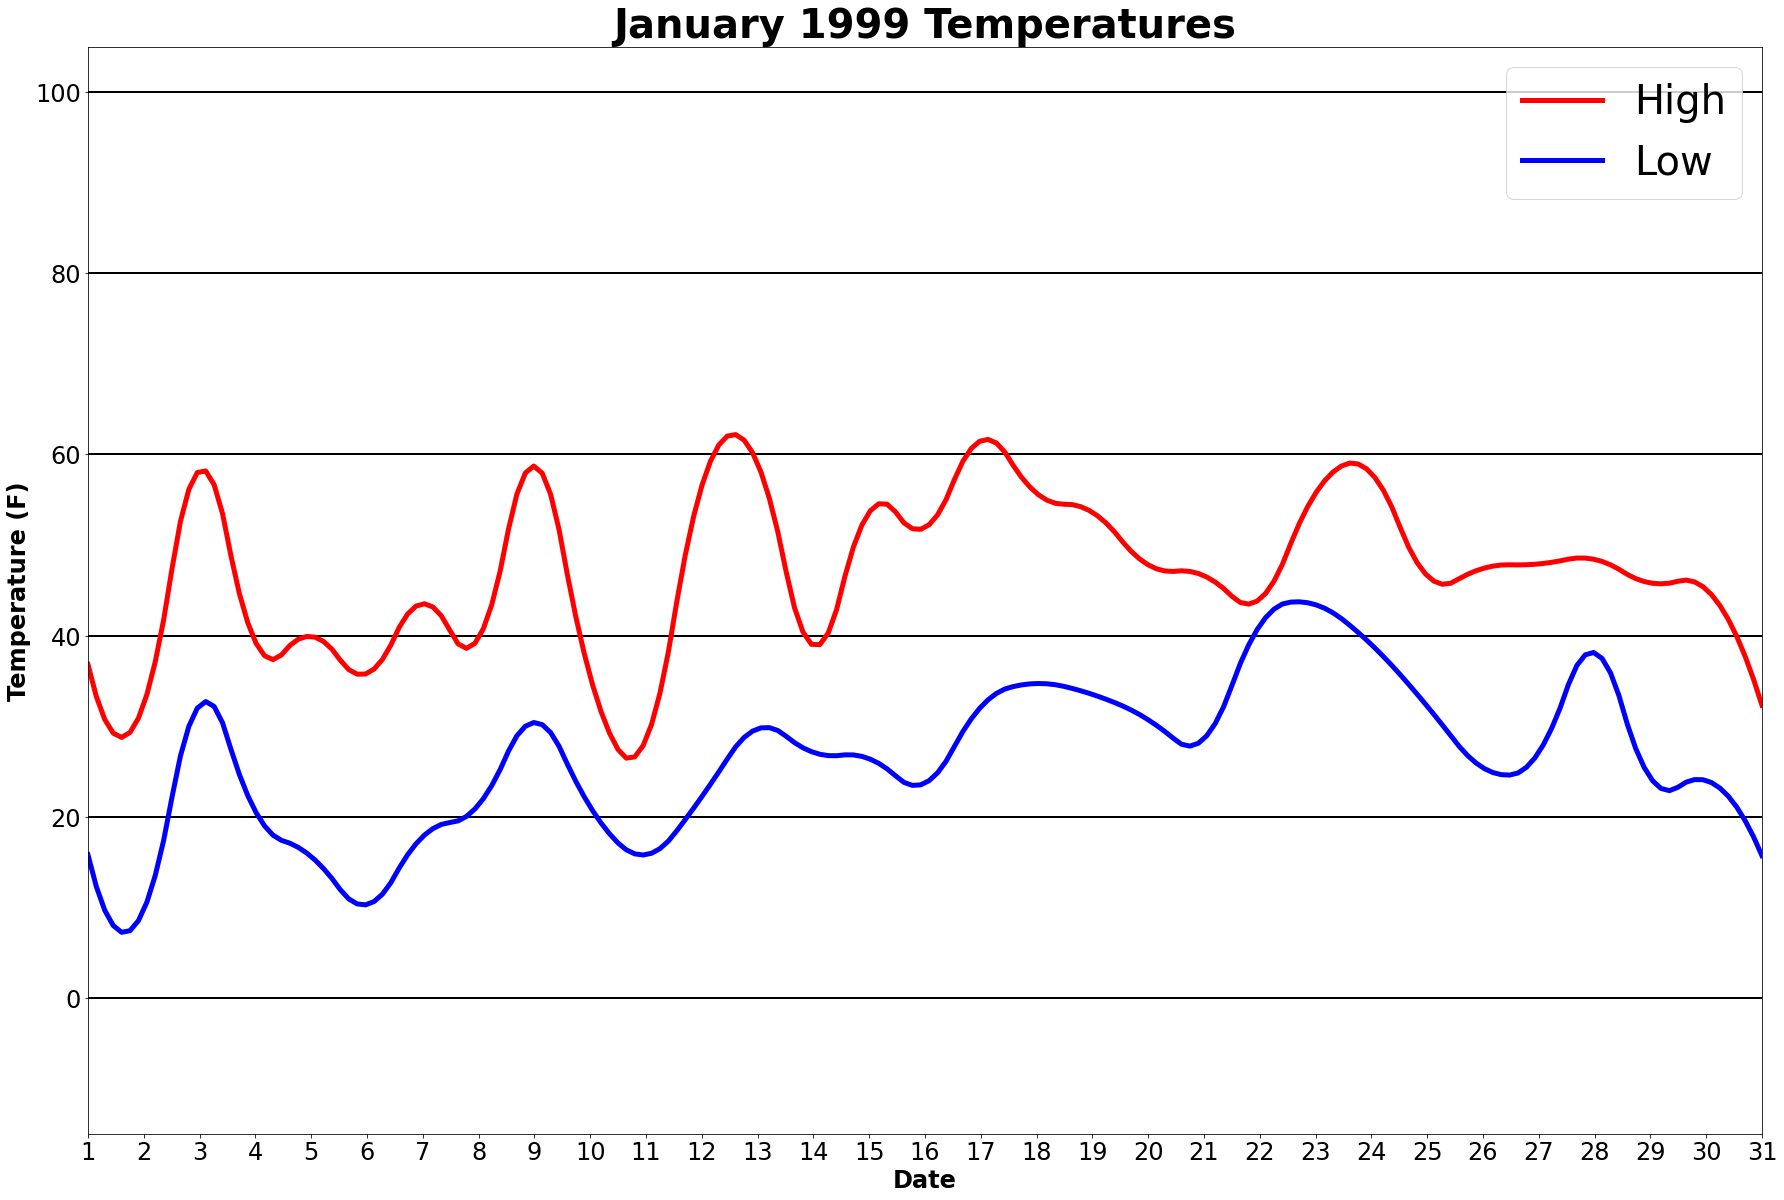

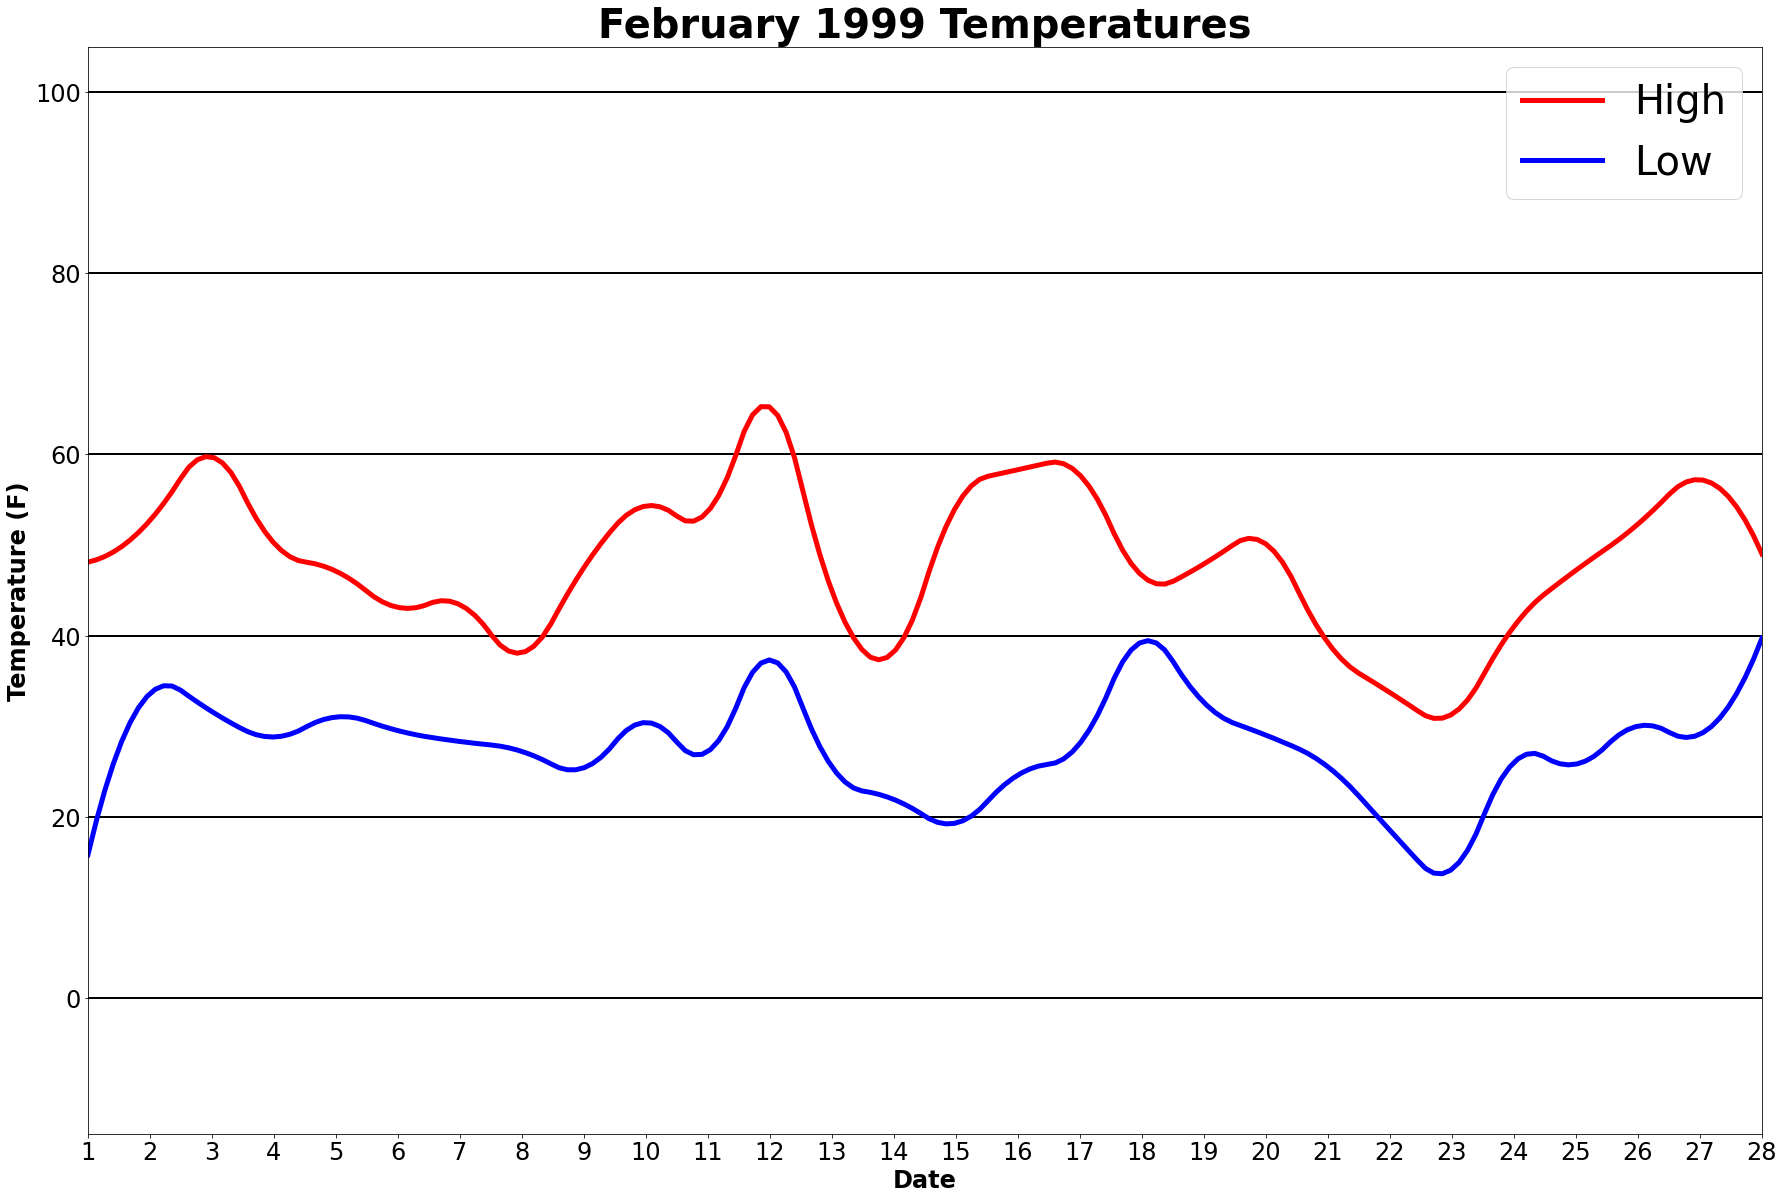

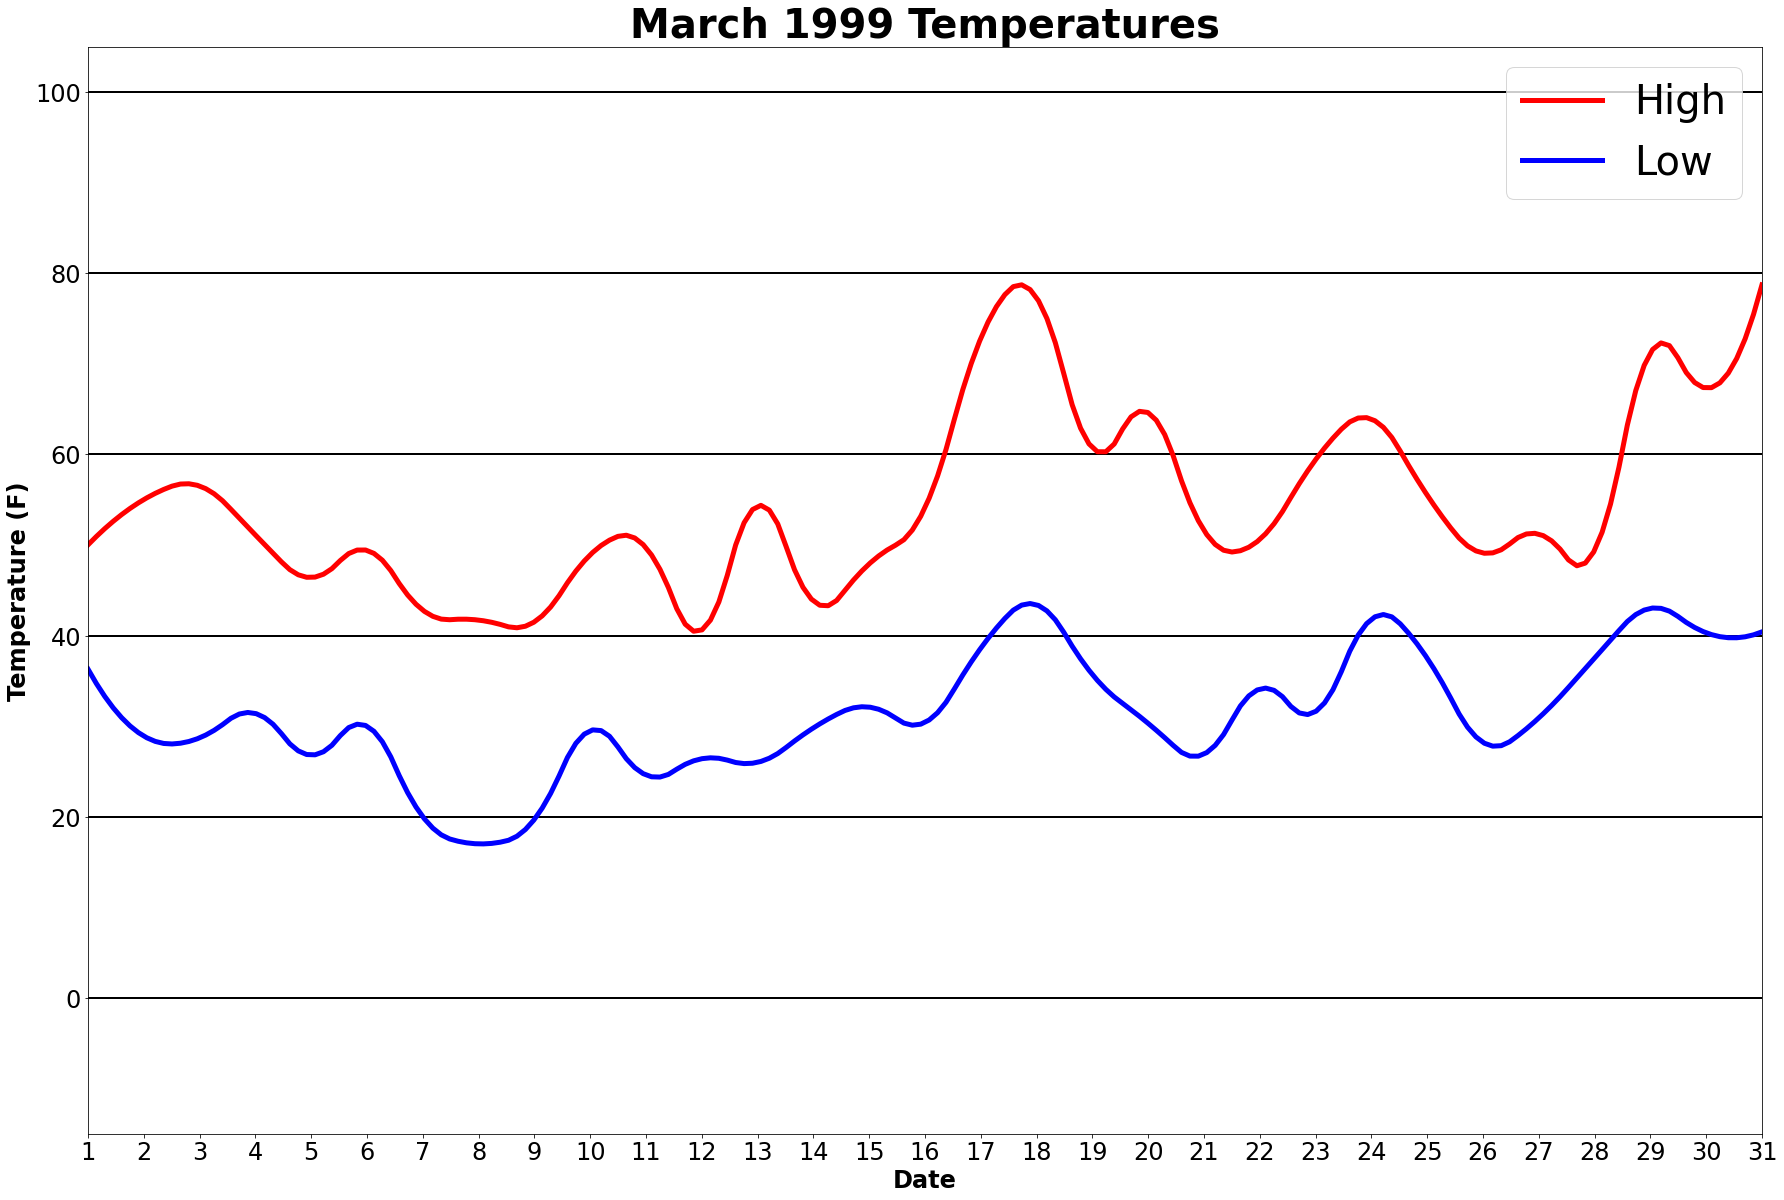

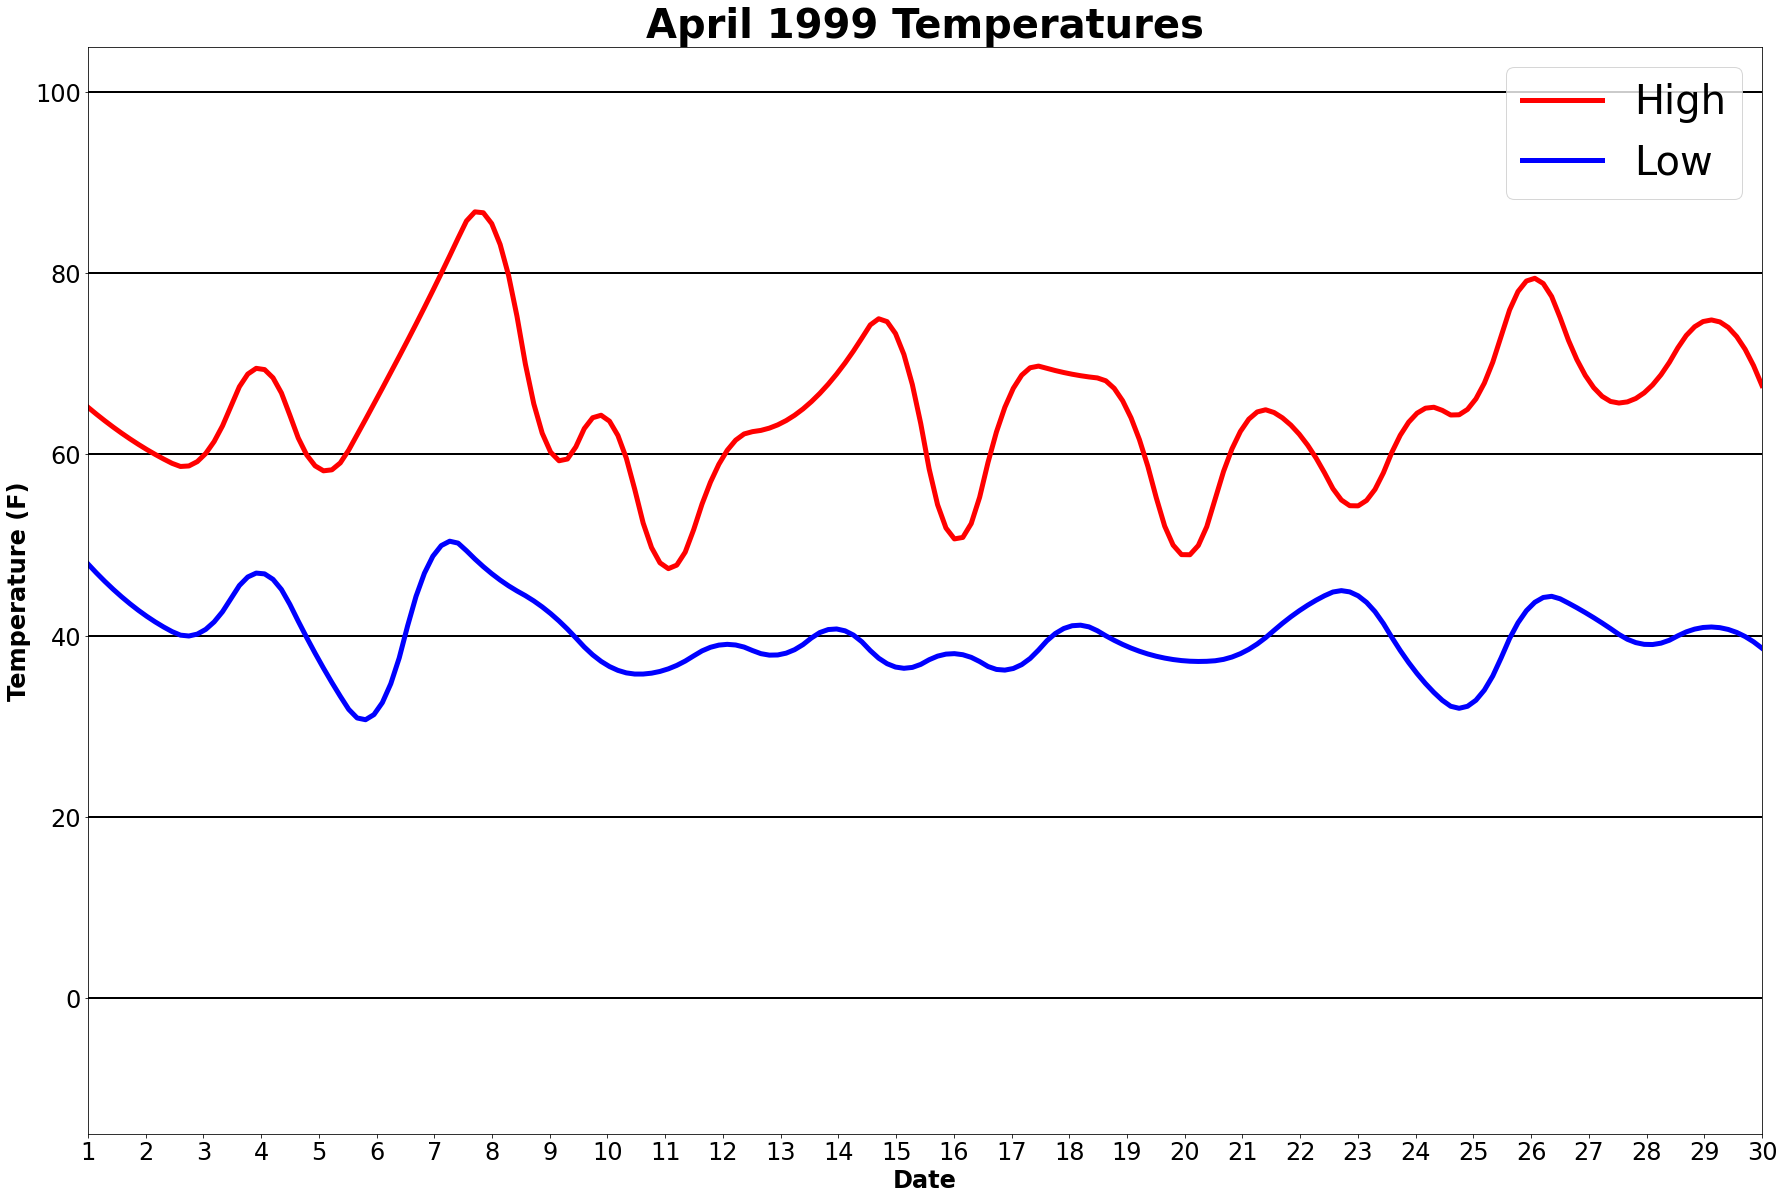

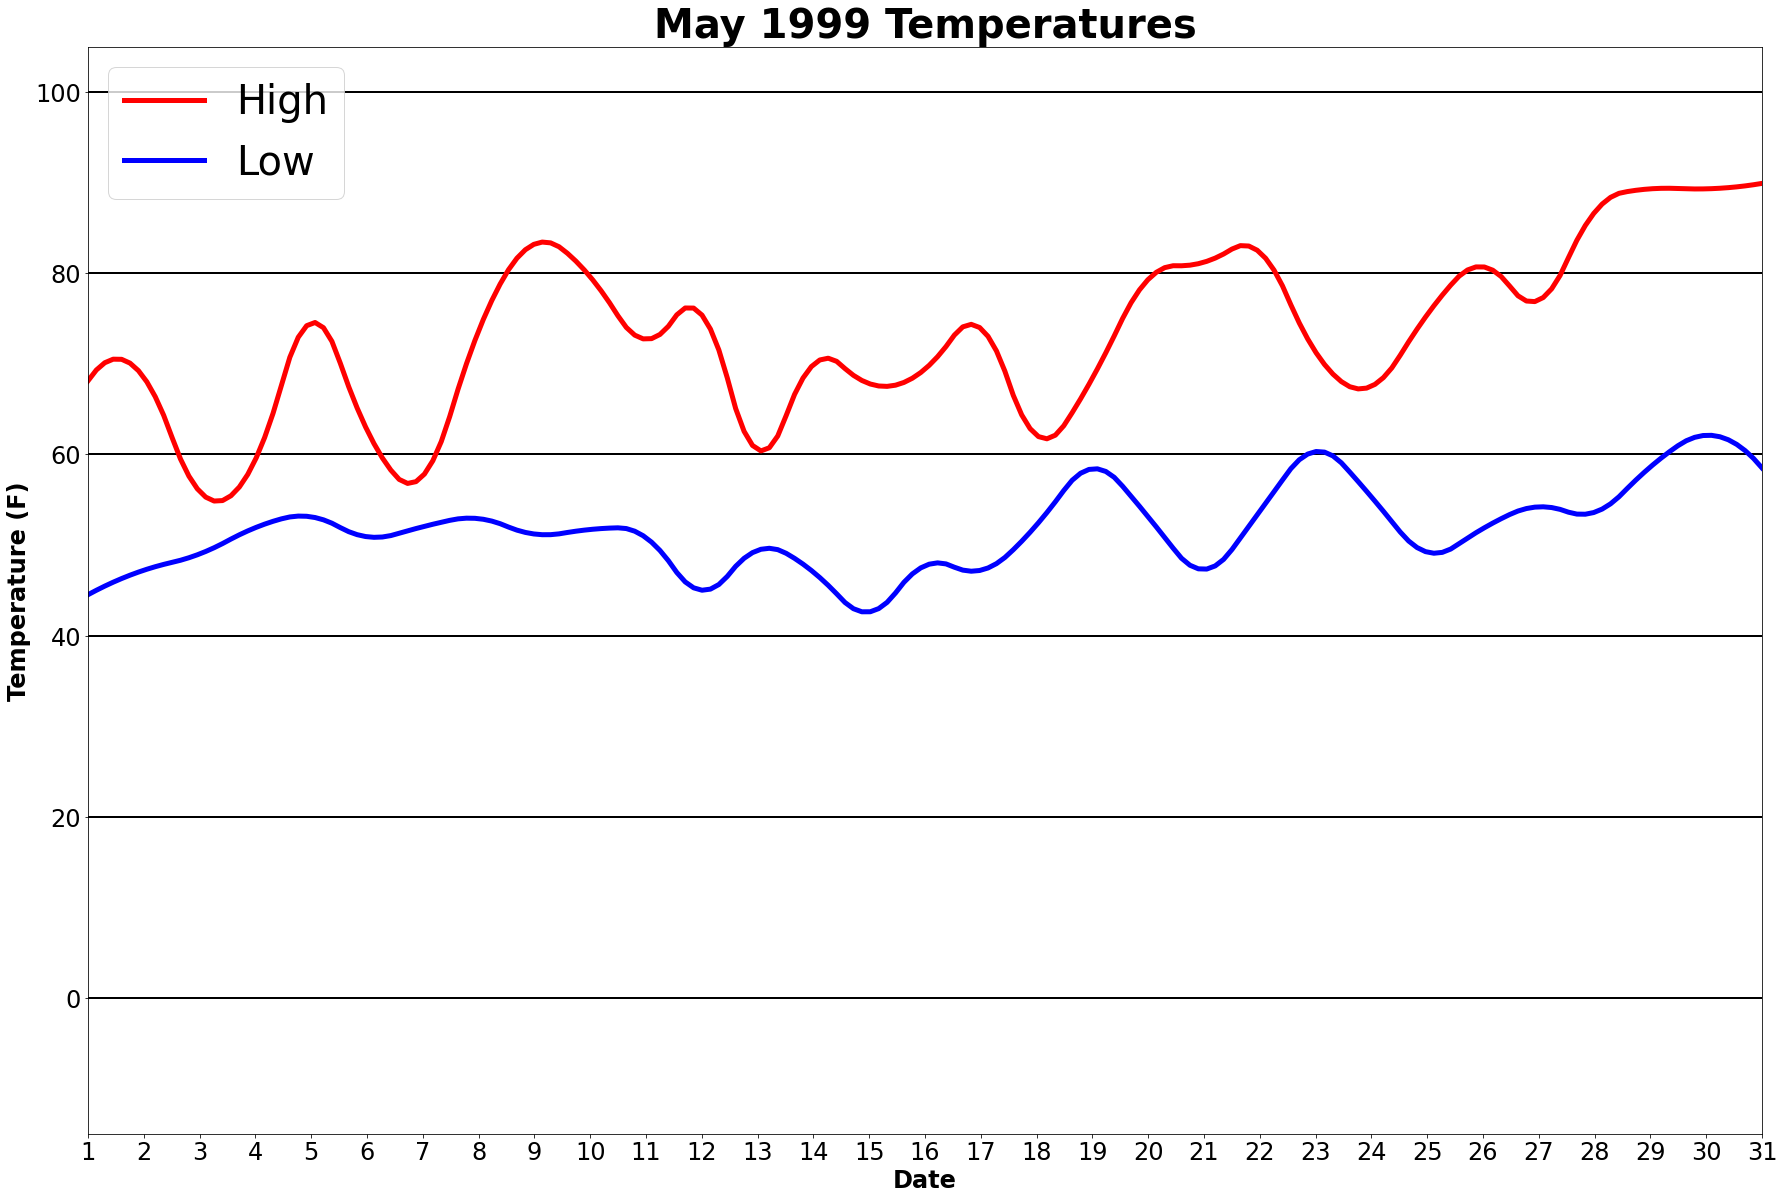

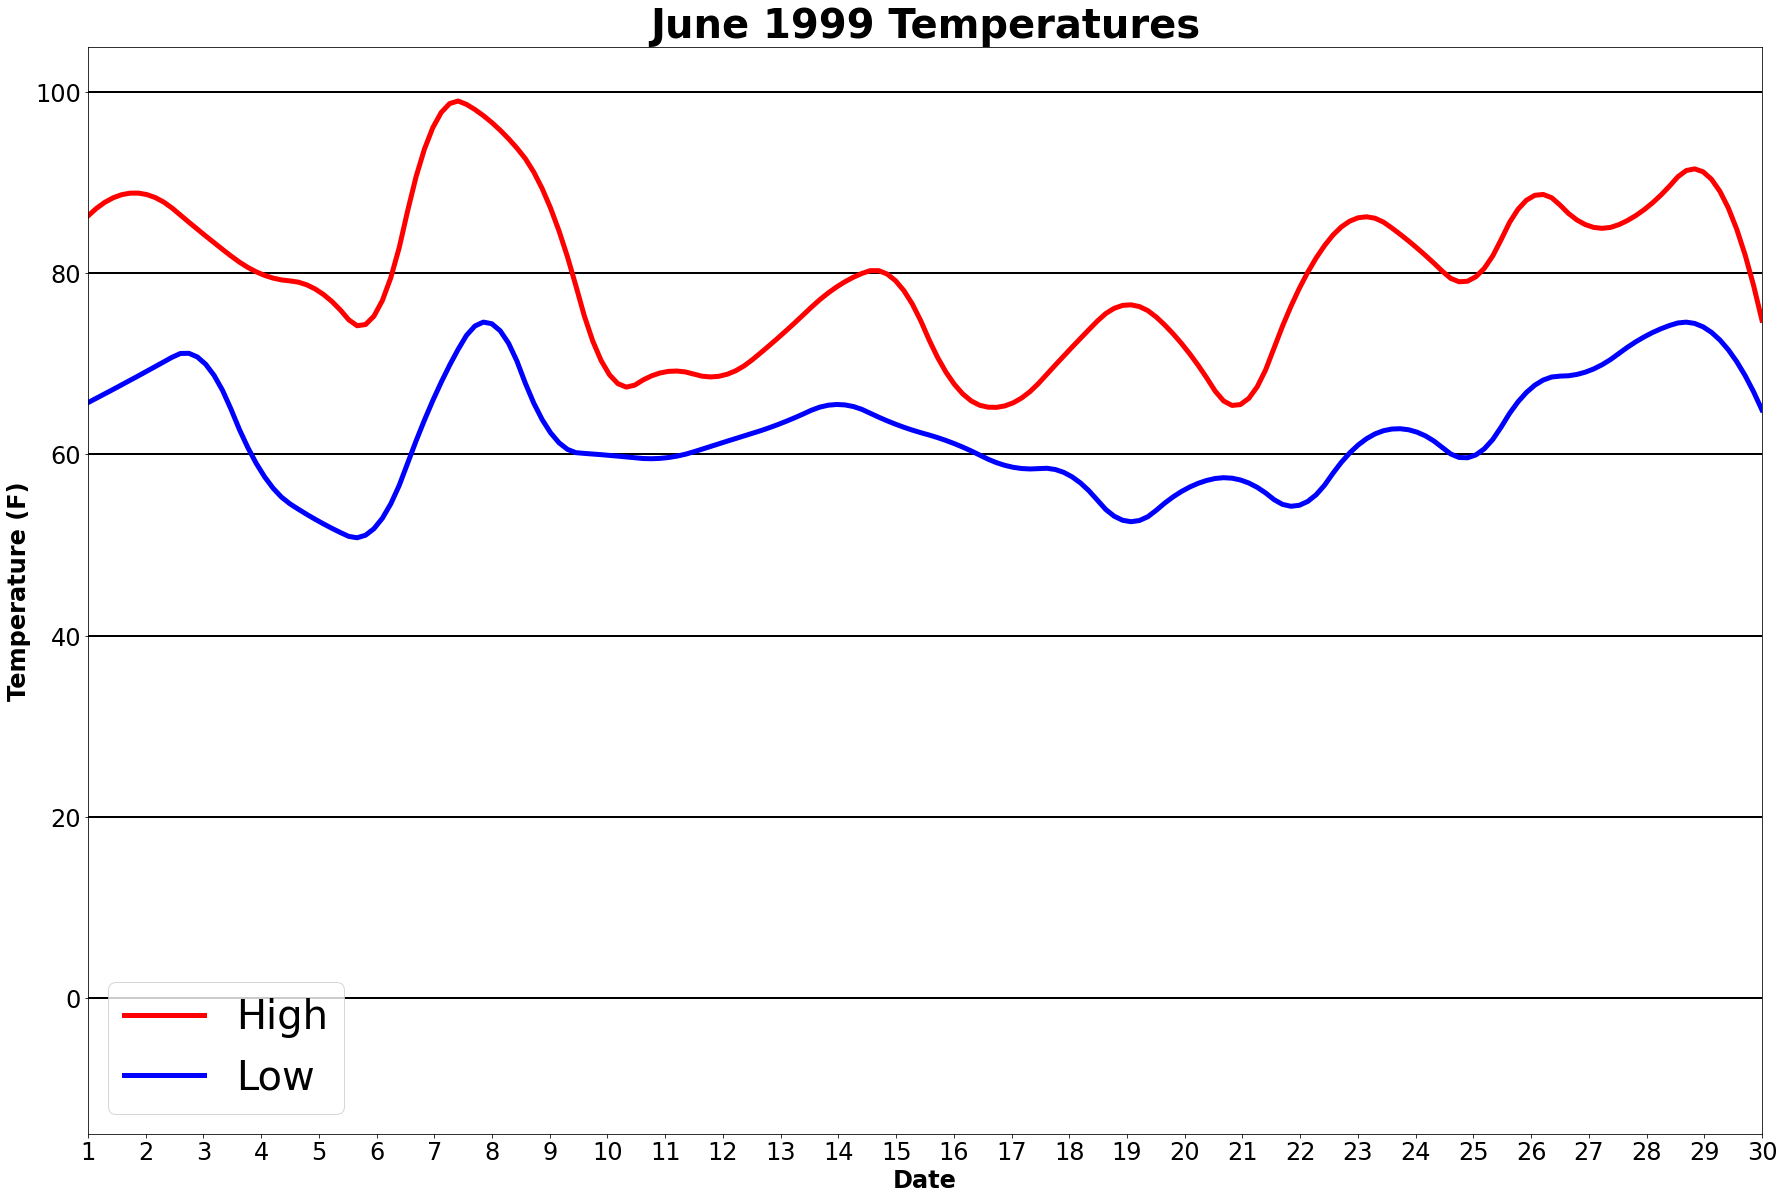

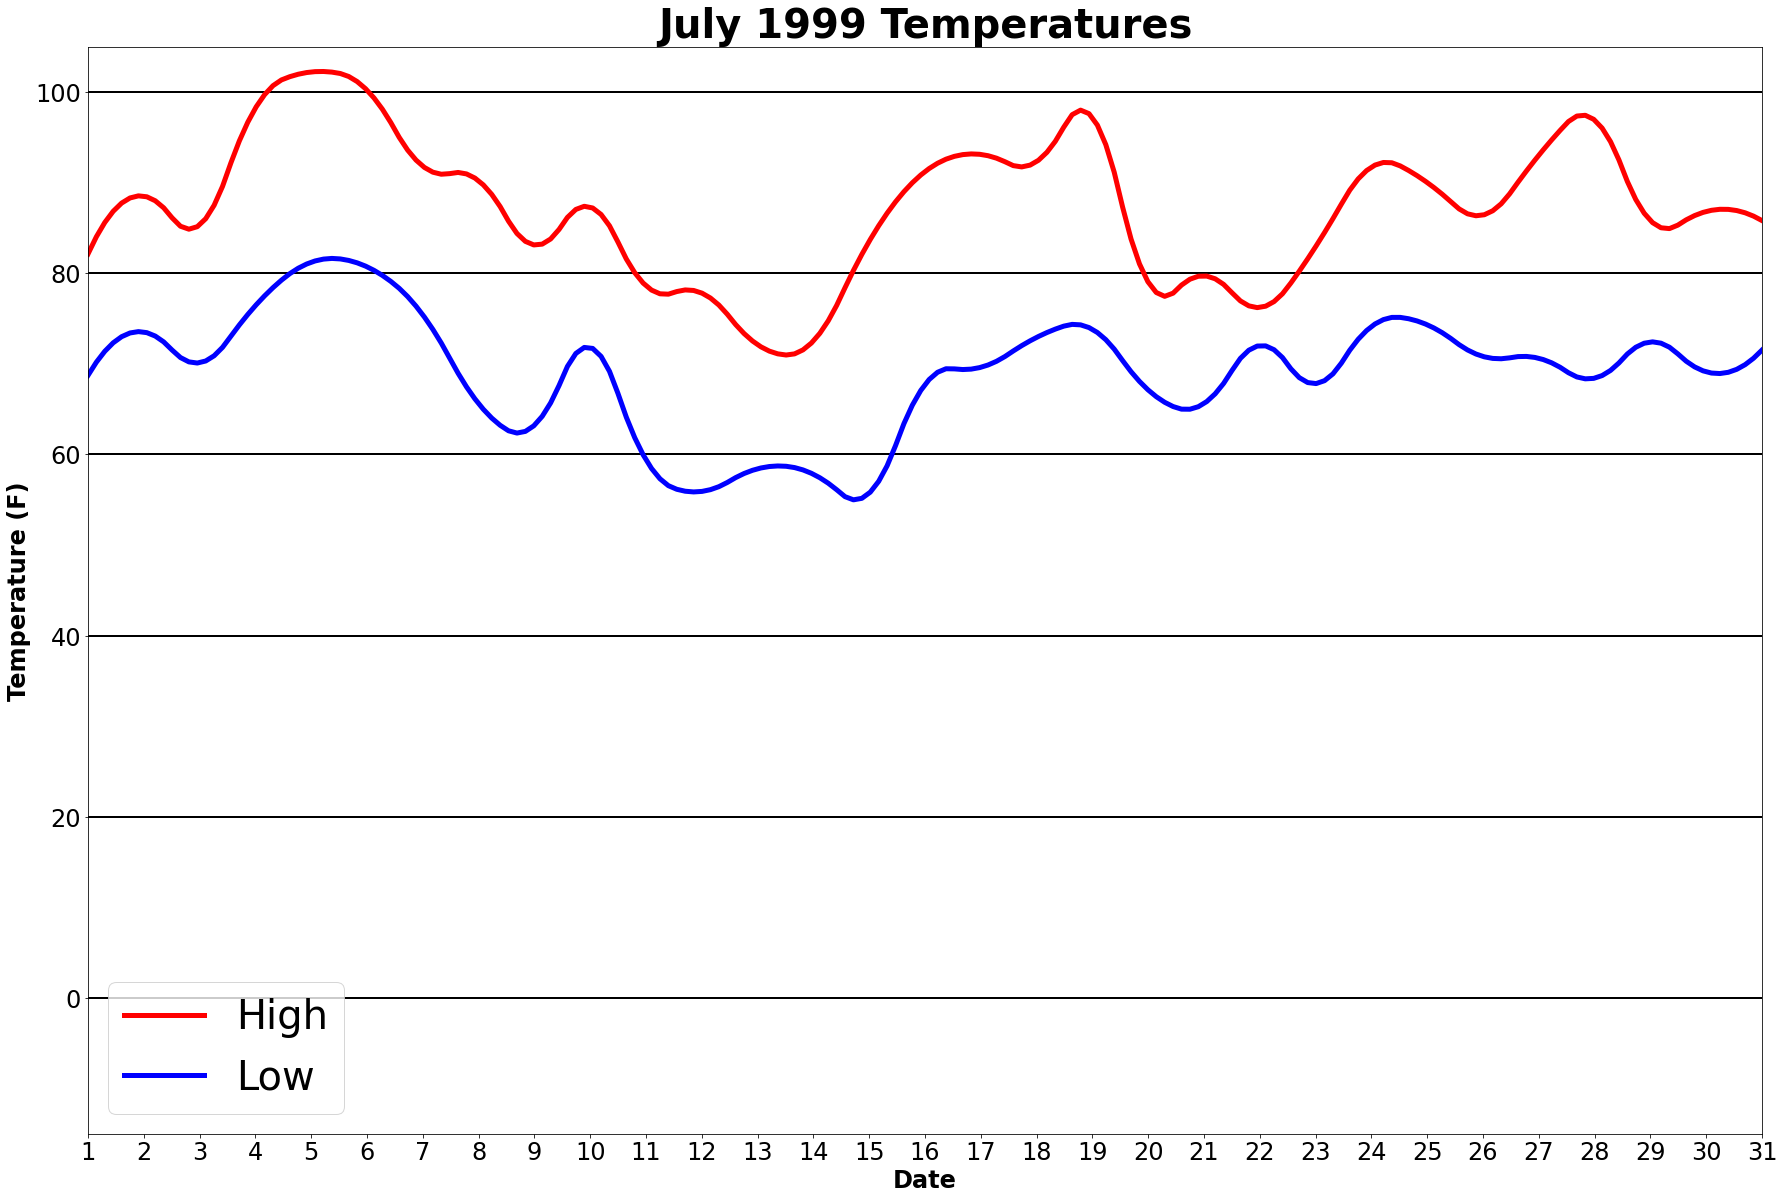

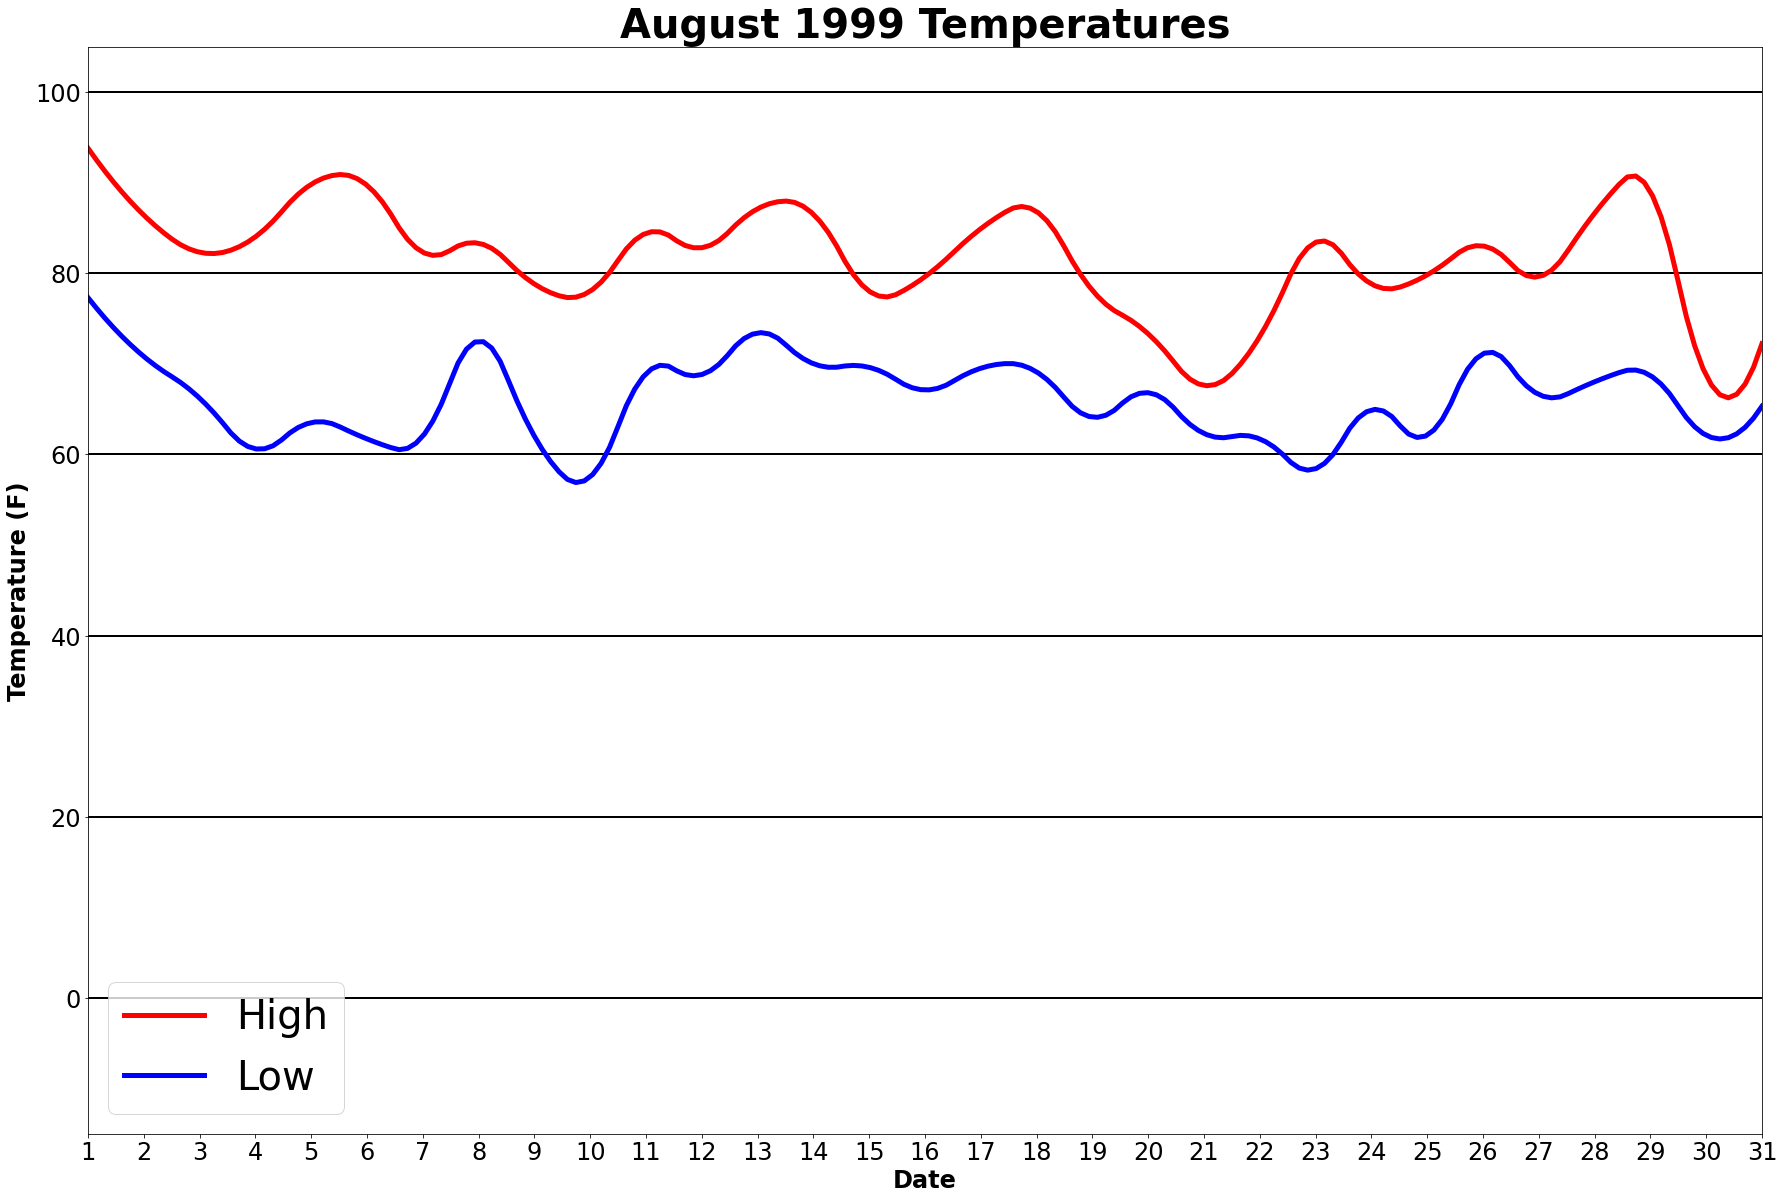

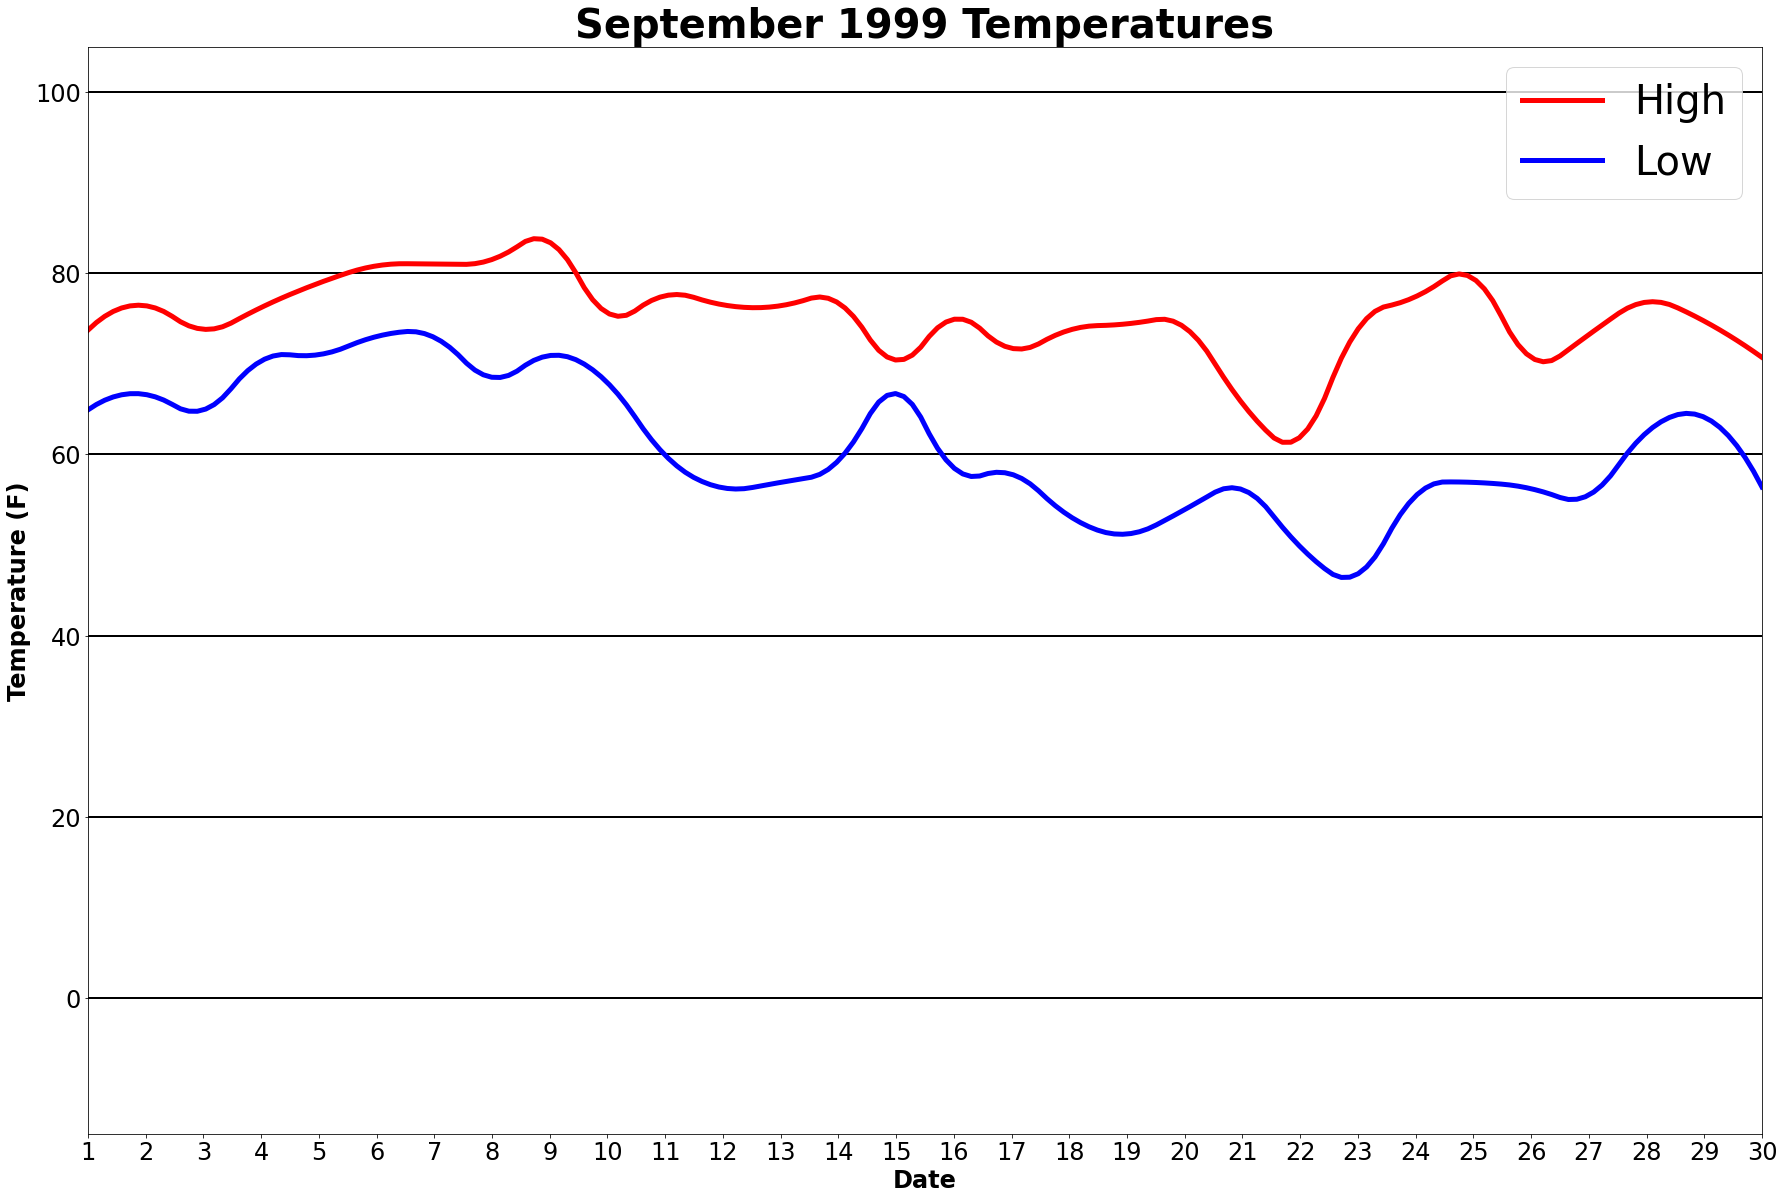

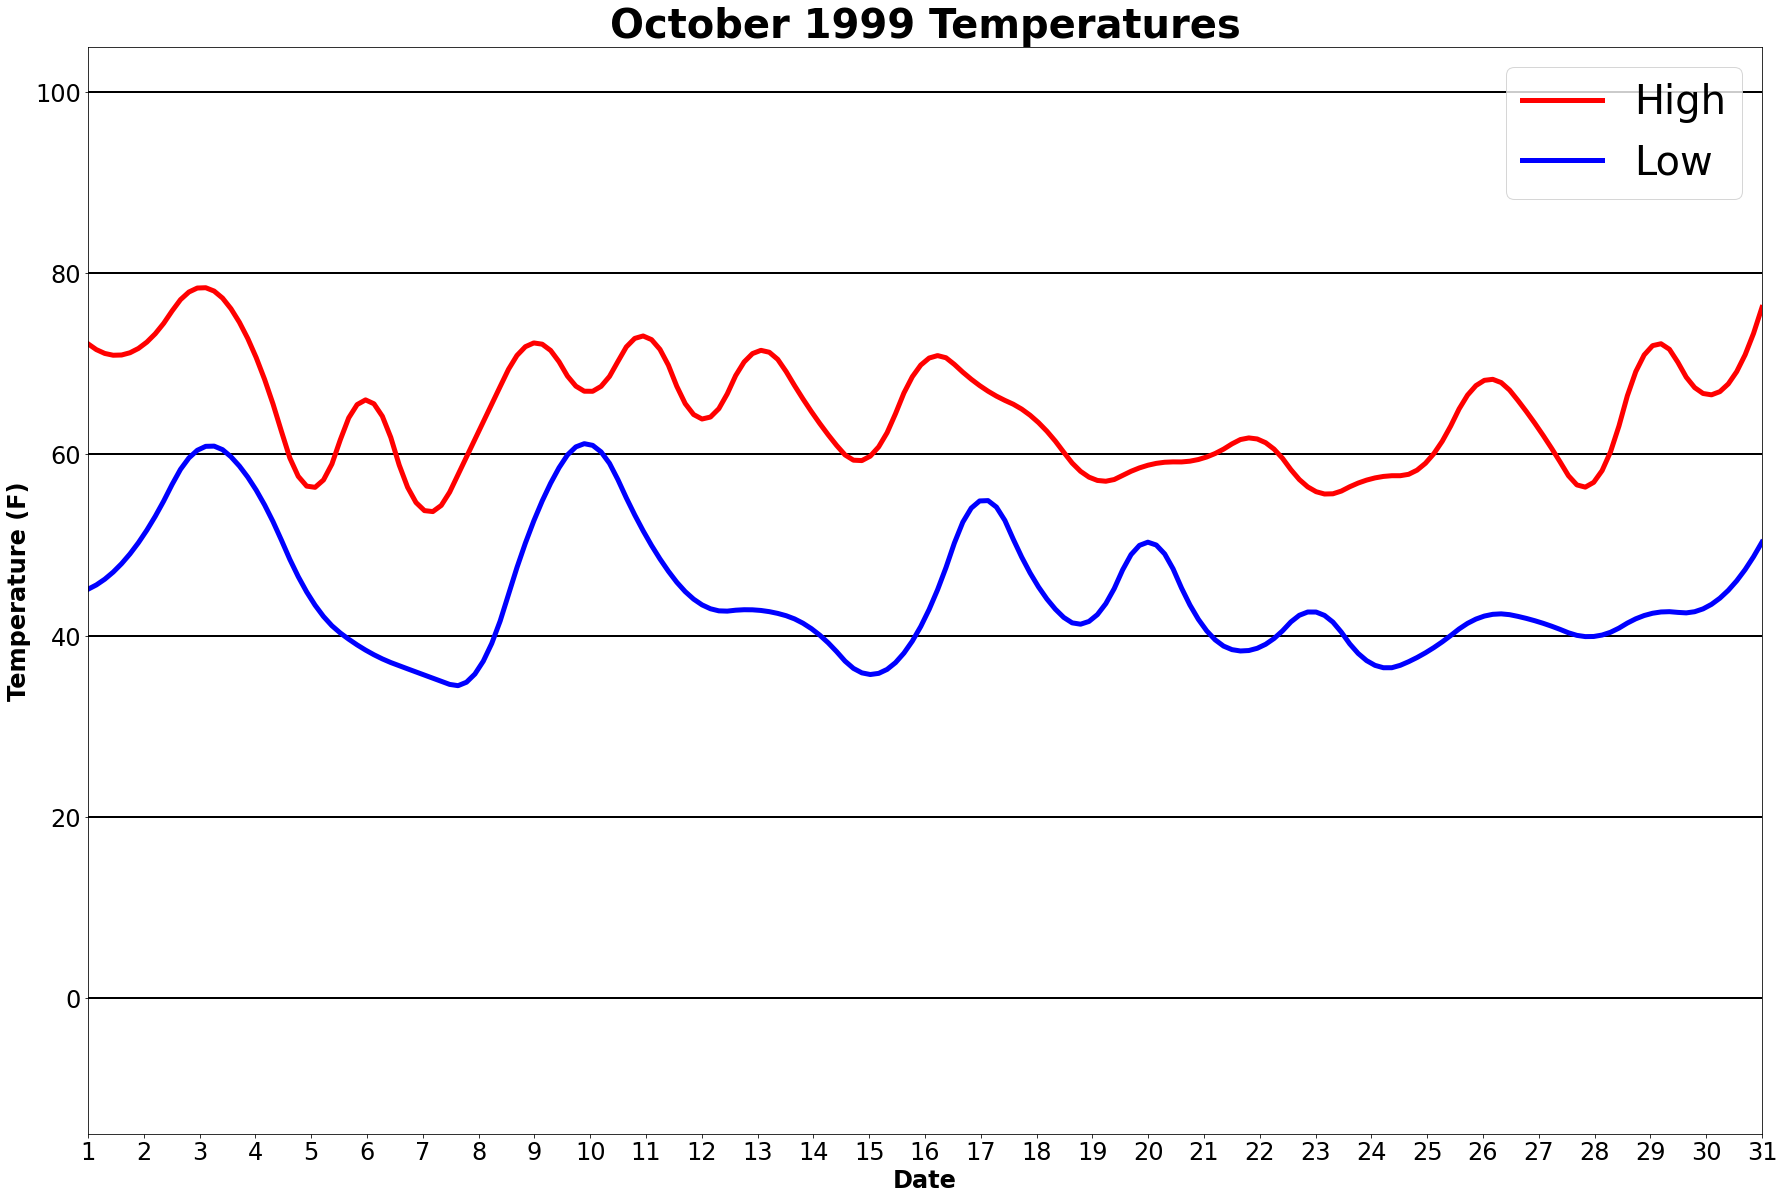

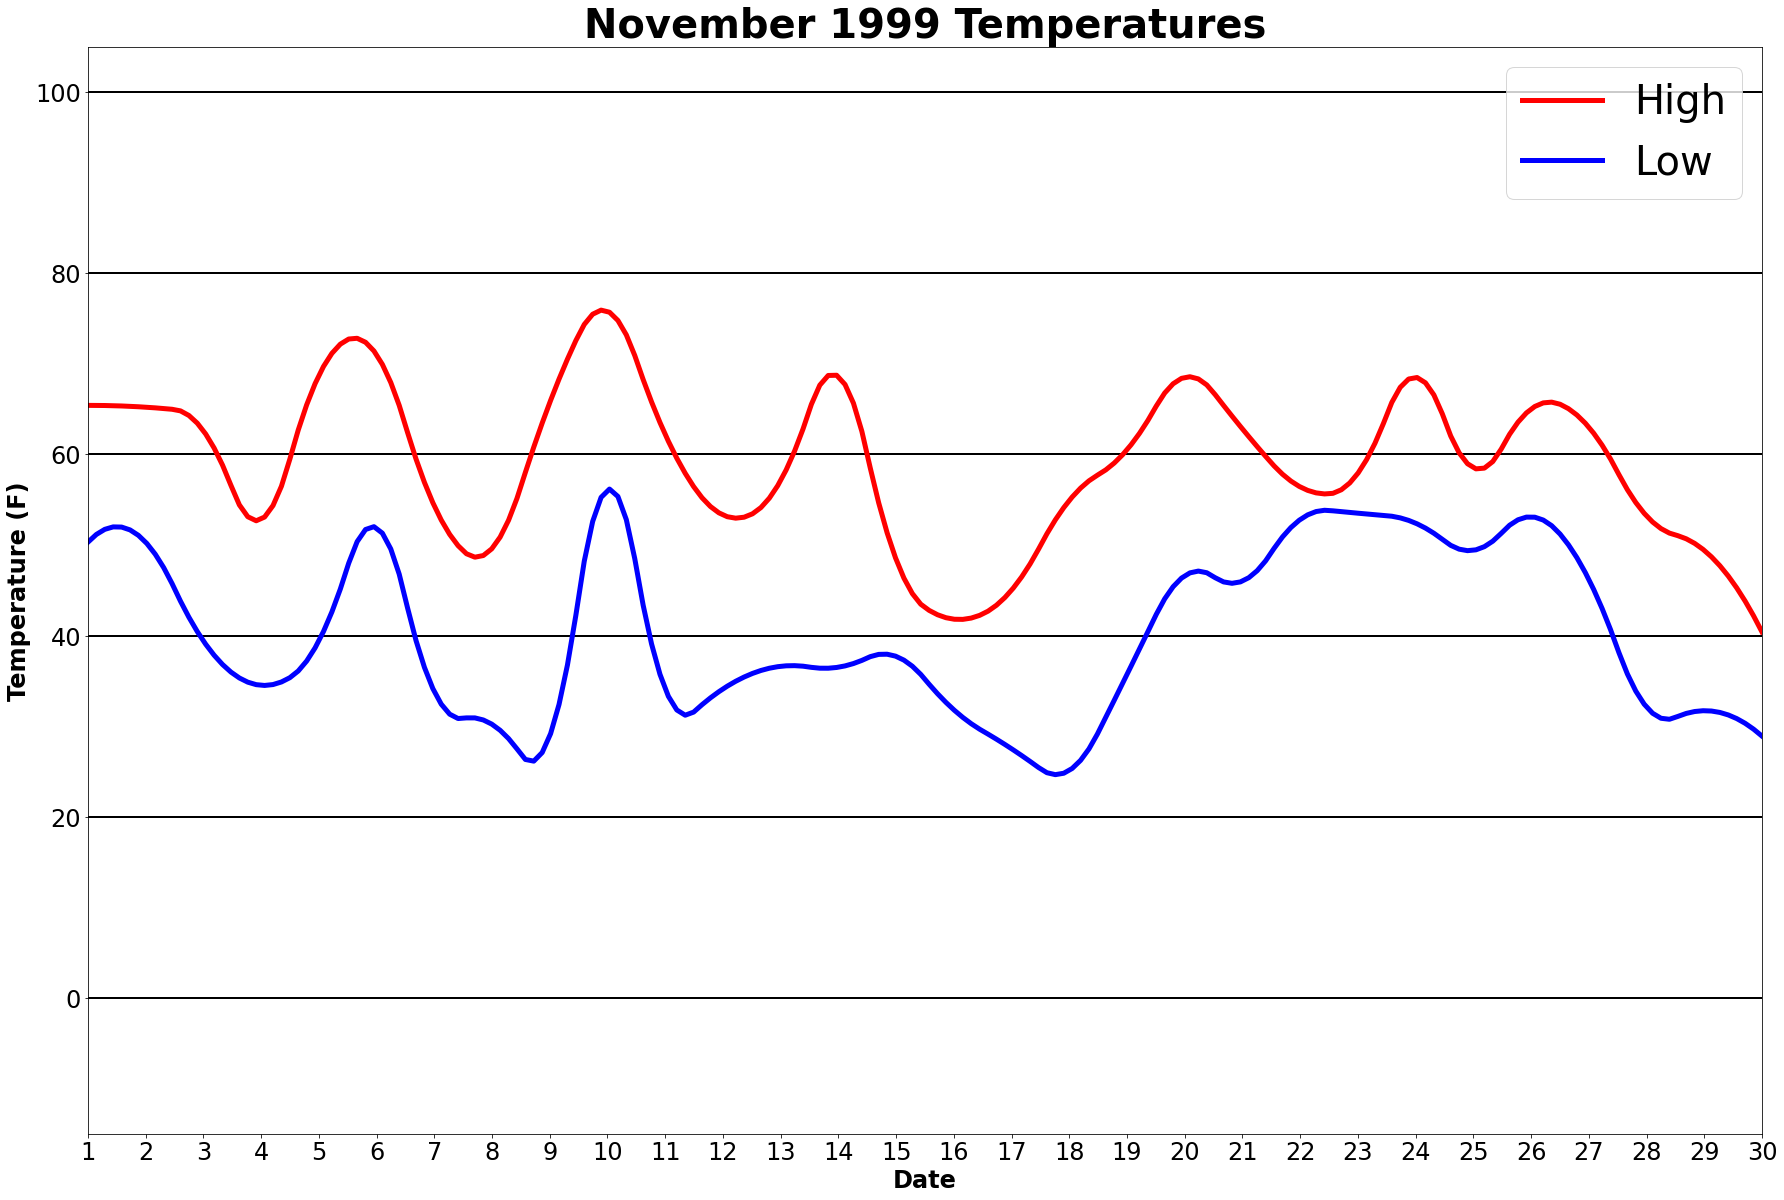

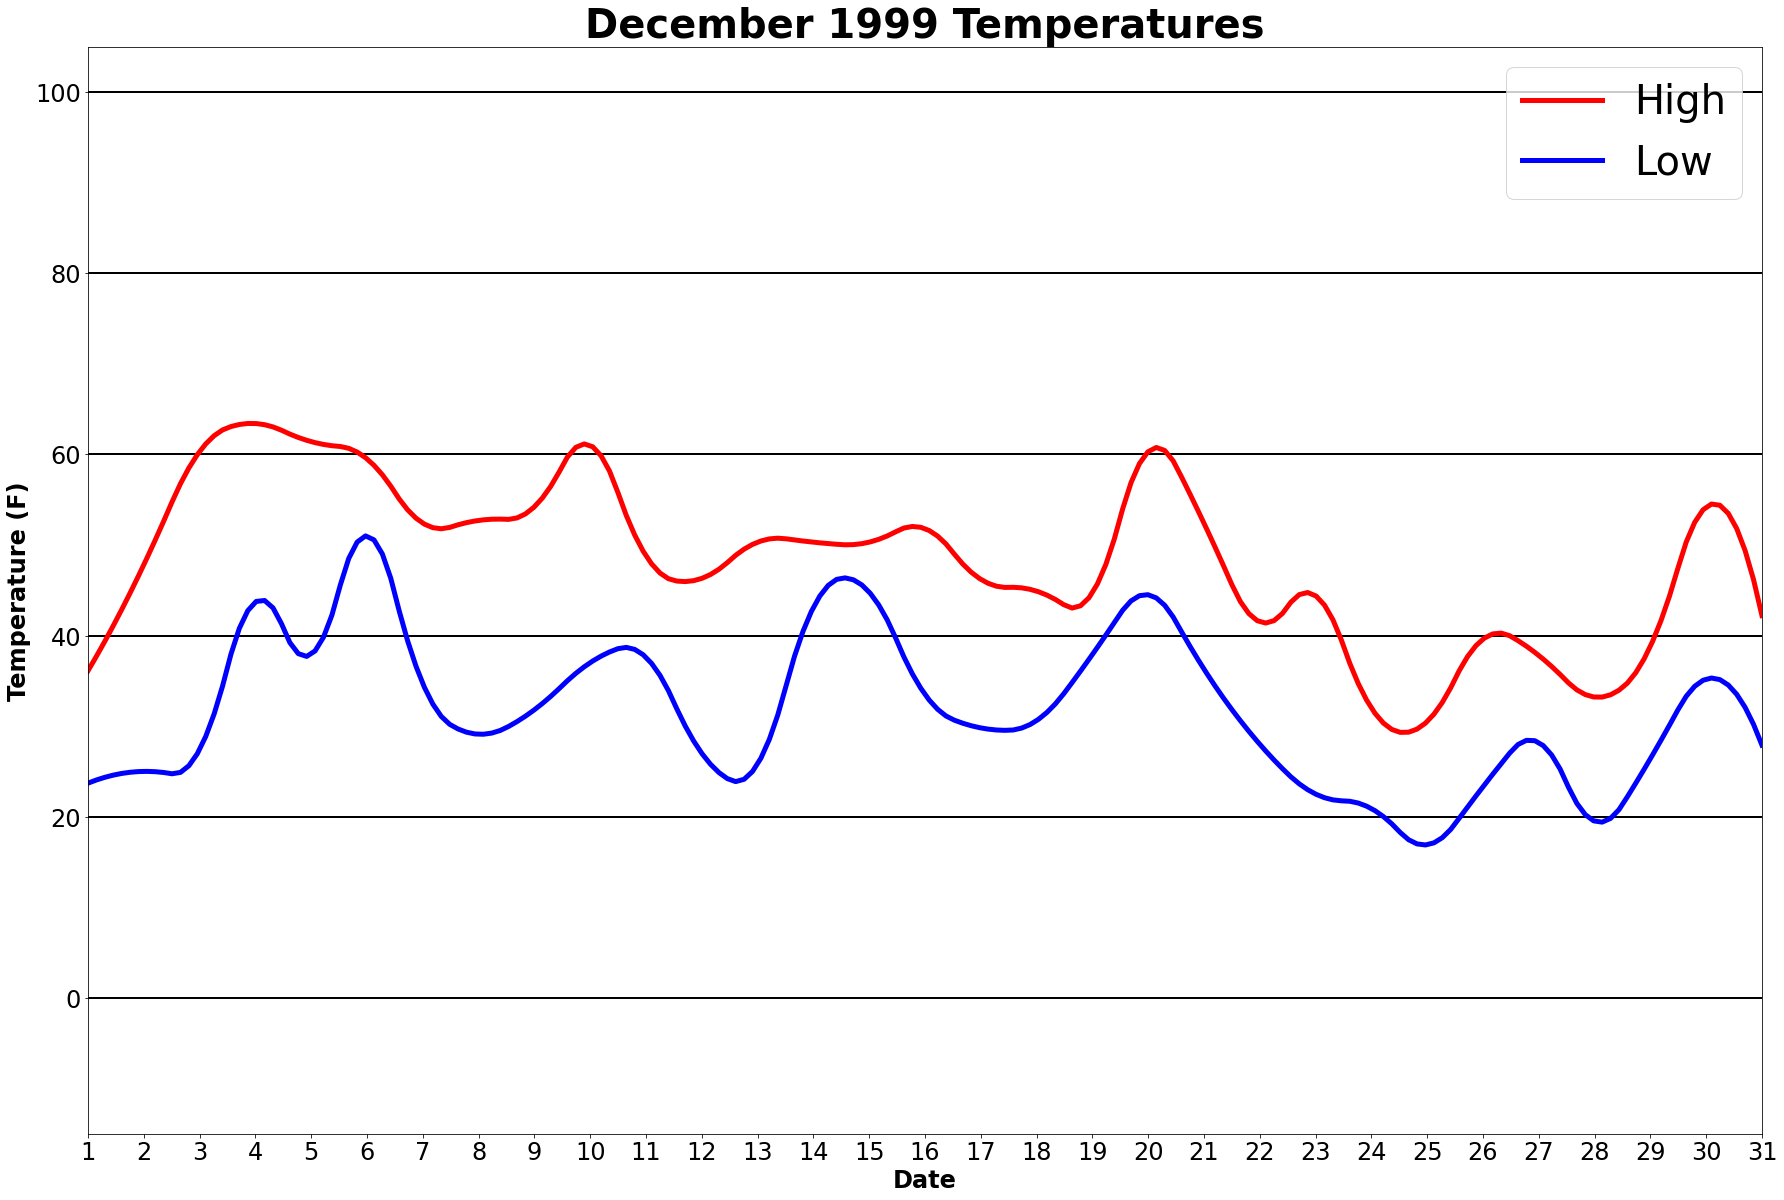

In [25]:
#
# Make some graphs - temperature line plots first
#

#years = range(2000,2022)
#for year in years:
#    print(year)
months = ['January','February', 'March','April','May','June','July','August','September','October','November','December']
year = "1999"

year = int(year)



if (year % 400 == 0):
    leap_year = True
elif (year % 100 == 0):
    leap_year = False
elif (year % 4 == 0):
    leap_year = True
else:
    leap_year = False

for month_name in months:
    
    print(f'{month_name} {year}')
    month31 = ['January','March', 'May', 'July', 'August', 'October', 'December']
    month30 = ['April', 'June', 'September', 'November']
    month28 = ['February']
 
    if month_name in month31:
        r = 31
    elif month_name in month30:
        r = 30 
    elif month_name in month28:
        if leap_year:
            r = 29
        else:
            r = 28
    else:
        r = 31
        
    print(r)    
       
    path = '/Volumes/Elements/code/readexcel/'
    wxdata = f'{month_name}_{year}.xlsx'
    getWXdata = pd.read_excel(f'{path}{wxdata}')
    getWXdata = getWXdata.drop((r), axis=0)   
    print(getWXdata)
   
    HI = getWXdata['High']
    LO = getWXdata["Low"]
    DATE = getWXdata["Date"]
    
    y = HI.to_numpy()
    y1 = LO.to_numpy()
    x = DATE.to_numpy()

    #define x as 200 equally spaced values between the min and max of original x 
    xnew = np.linspace(x.min(), x.max(), 200) 

    #define spline
    HIspl = make_interp_spline(x, y, k=2)
    y_smooth = HIspl(xnew)
    LOspl = make_interp_spline(x, y1, k=2)
    y1_smooth = LOspl(xnew)

    #Plot the results in matplotlib
    plt.figure(figsize=(30, 20))
    plt.locator_params(axis='x', nbins= r)
    plt.xlim(1, r)
    plt.xticks(fontsize=24)
    plt.xlabel('Date', fontsize=24, fontweight ='bold')
    plt.yticks(fontsize=24)
    plt.ylim(-15, 105)
    plt.ylabel('Temperature (F)', fontsize=24, fontweight ='bold')
    plt.locator_params(axis='y', nbins=10)
    plt.title(f'{month_name} {year} Temperatures', fontsize=40, fontweight ='bold')
    plt.grid(axis = "y", linewidth = 2.0, color = 'black')
    plt.plot(xnew,y_smooth,color = "red", linewidth =5, label ="High")
    plt.plot(xnew,y1_smooth,color = "blue", linewidth =5, label ="Low")
    plt.legend(fontsize=40)
    plt.savefig(f'{path}{month_name}temps_{year}')

    print(f'{month_name} {year} created')   
 

January 1999
31
January 1999 created
February 1999
28
February 1999 created
March 1999
31
March 1999 created
April 1999
30
April 1999 created
May 1999
31
May 1999 created
June 1999
30
June 1999 created
July 1999
31
July 1999 created
August 1999
31
August 1999 created
September 1999
30
September 1999 created
October 1999
31
October 1999 created
November 1999
30
November 1999 created
December 1999
31
December 1999 created


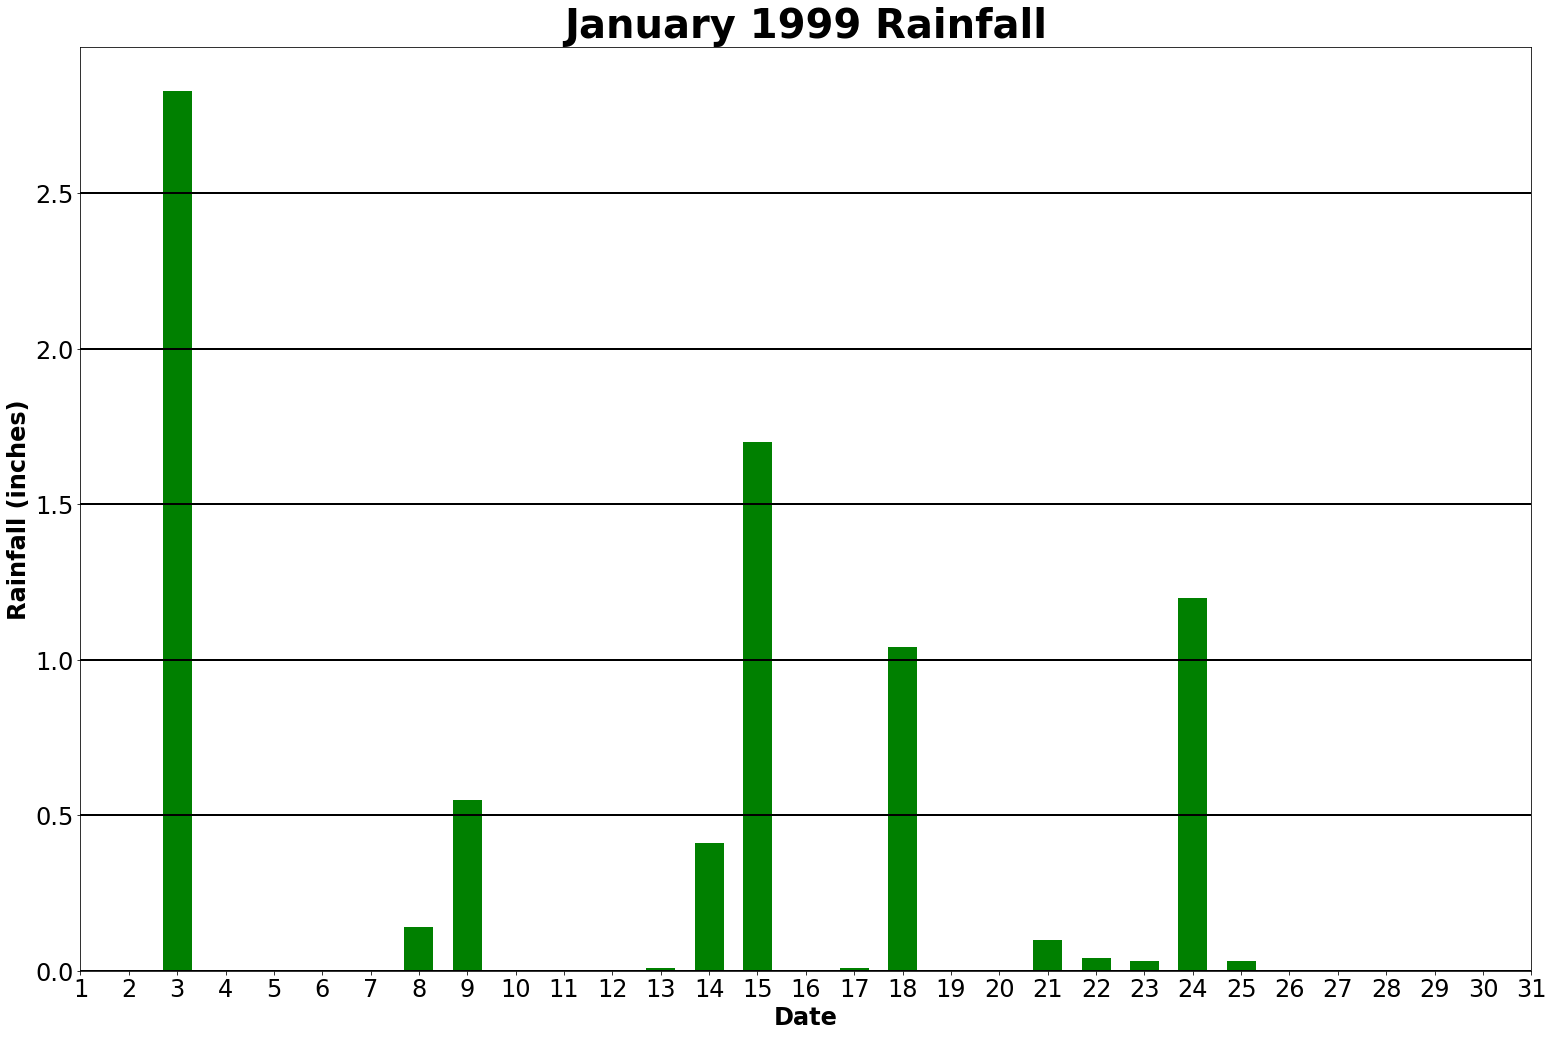

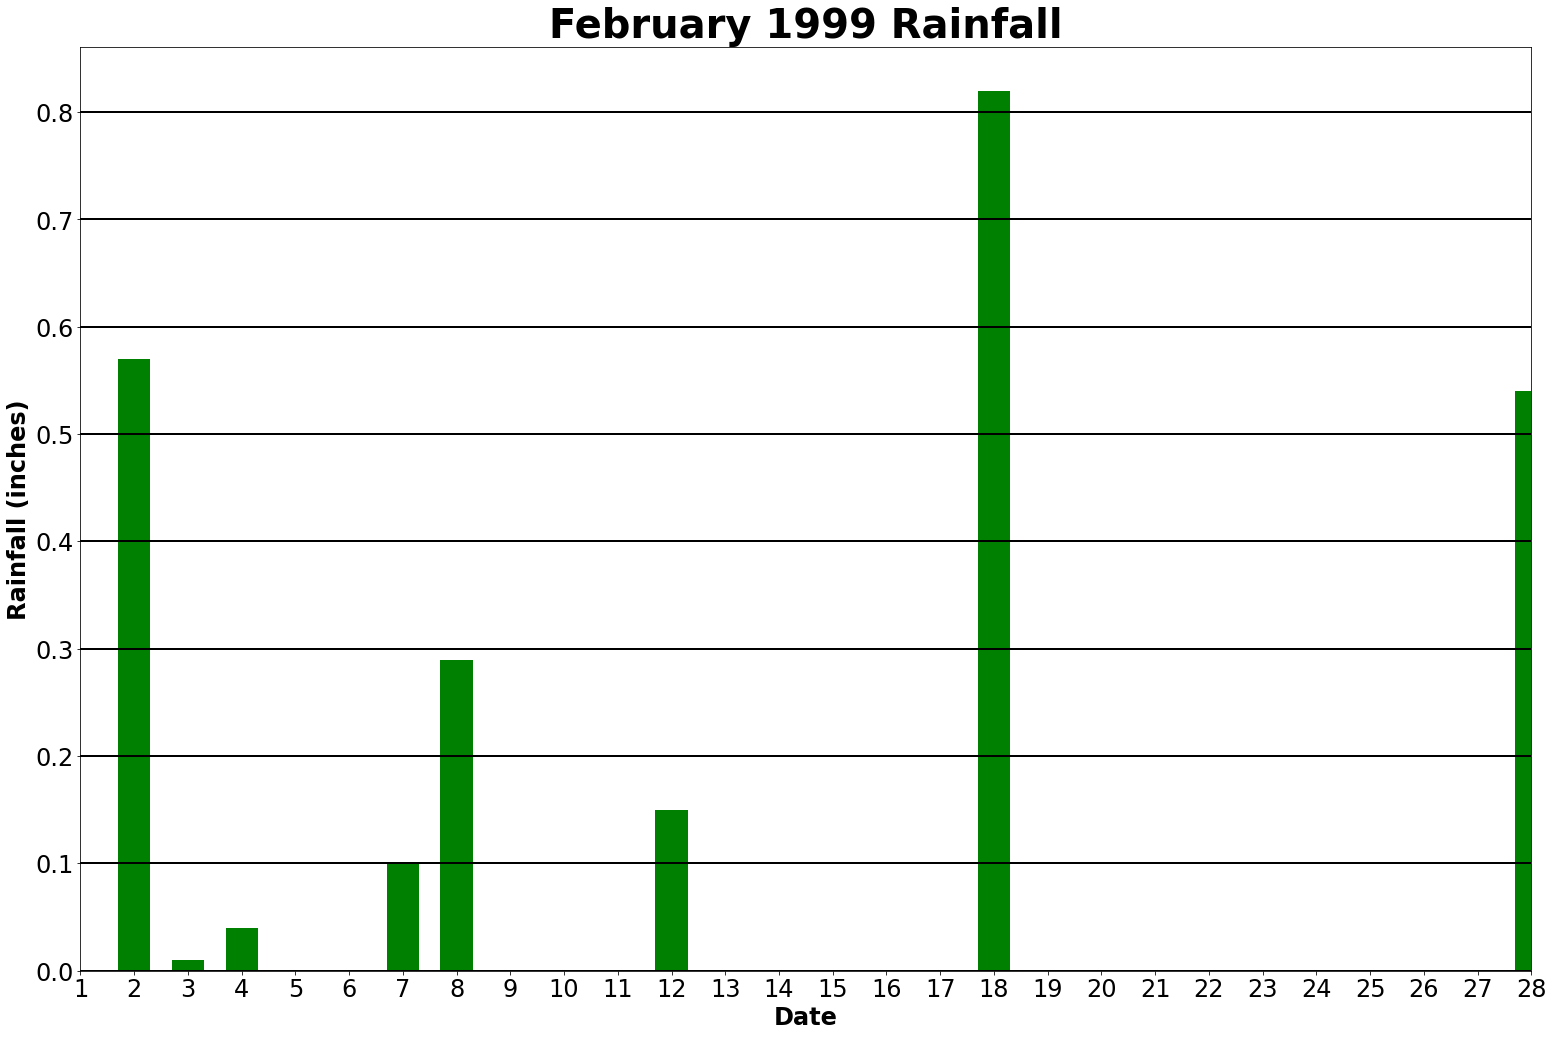

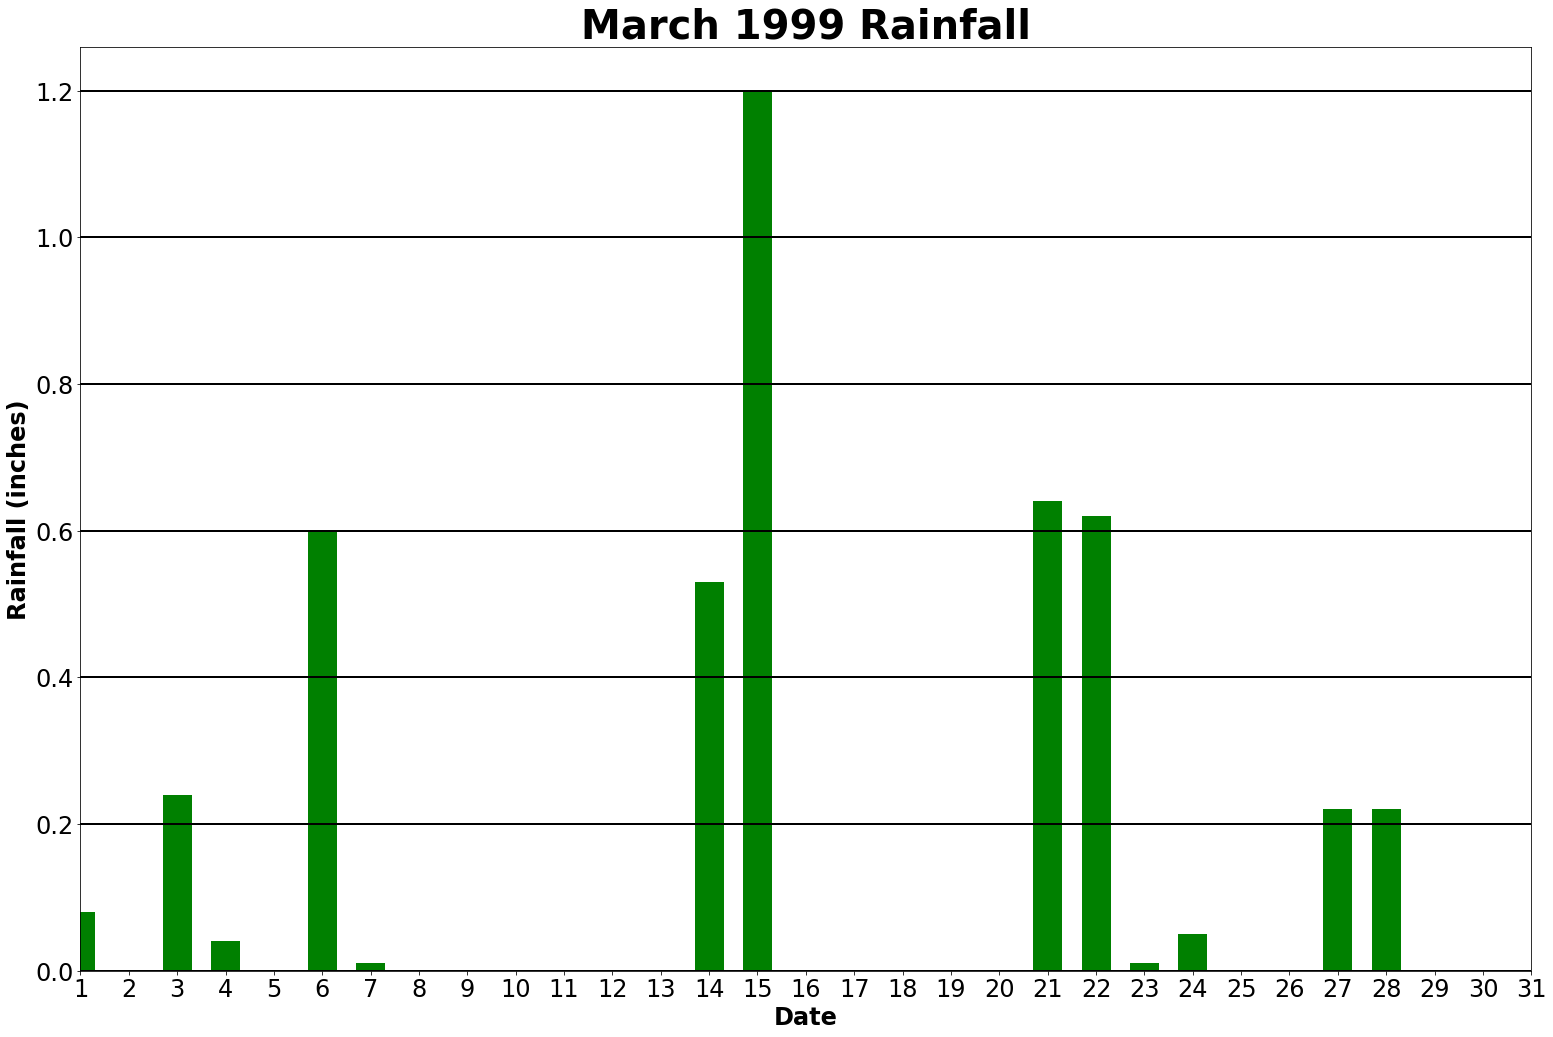

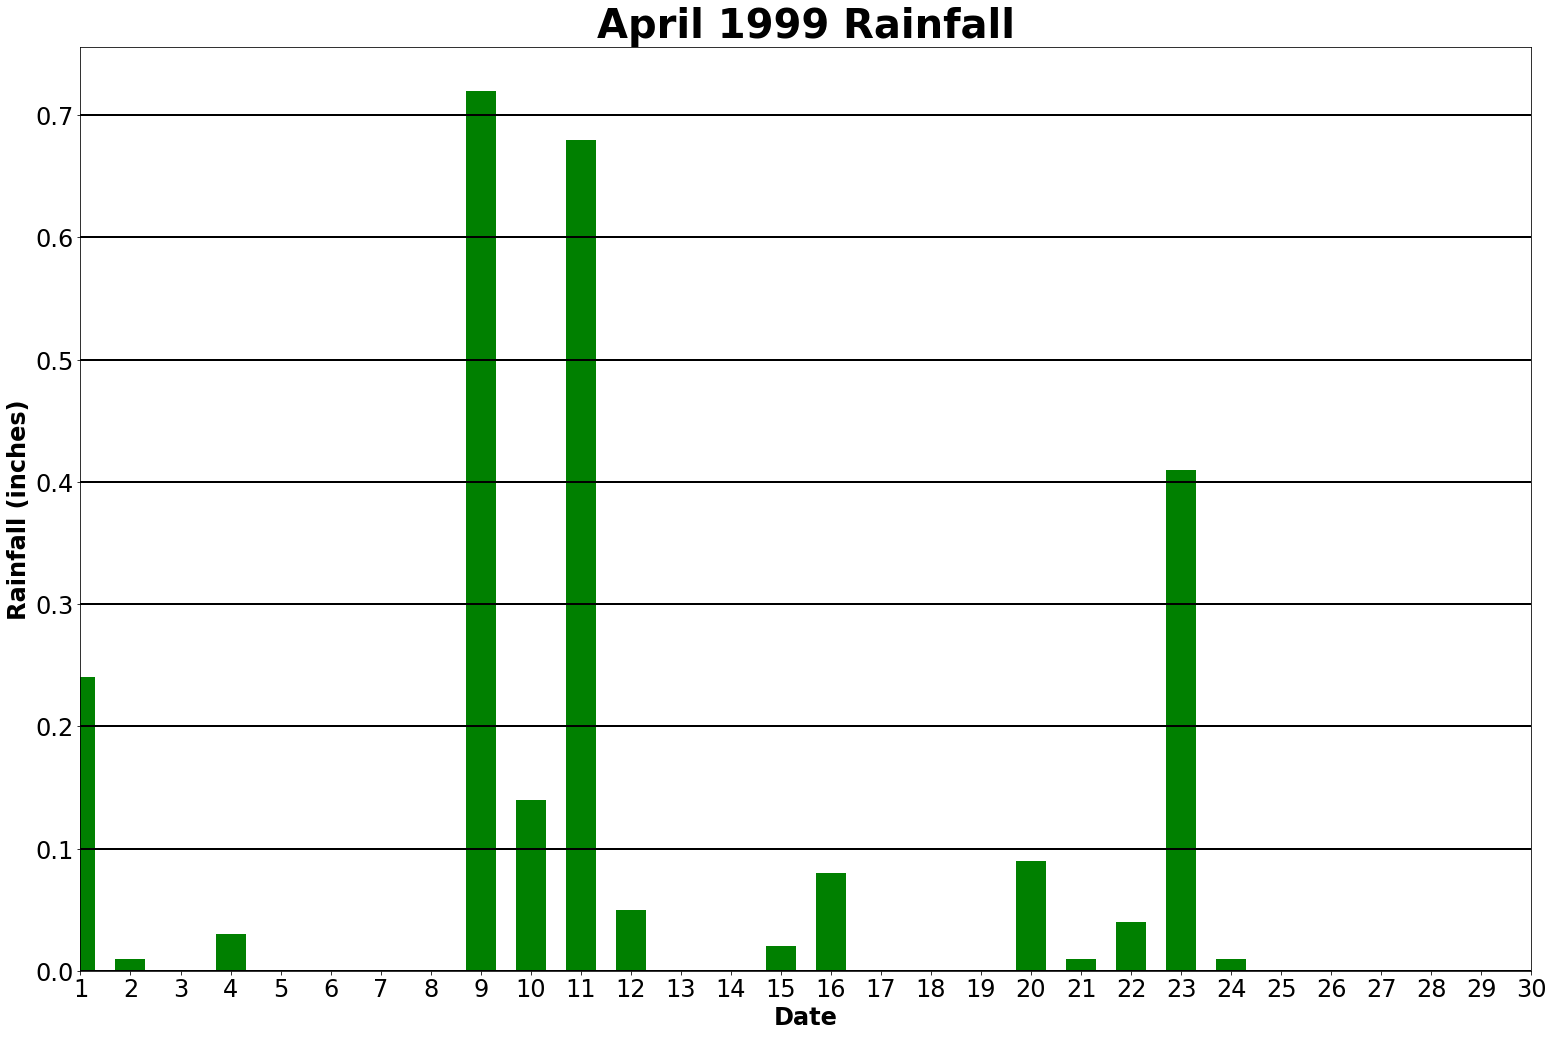

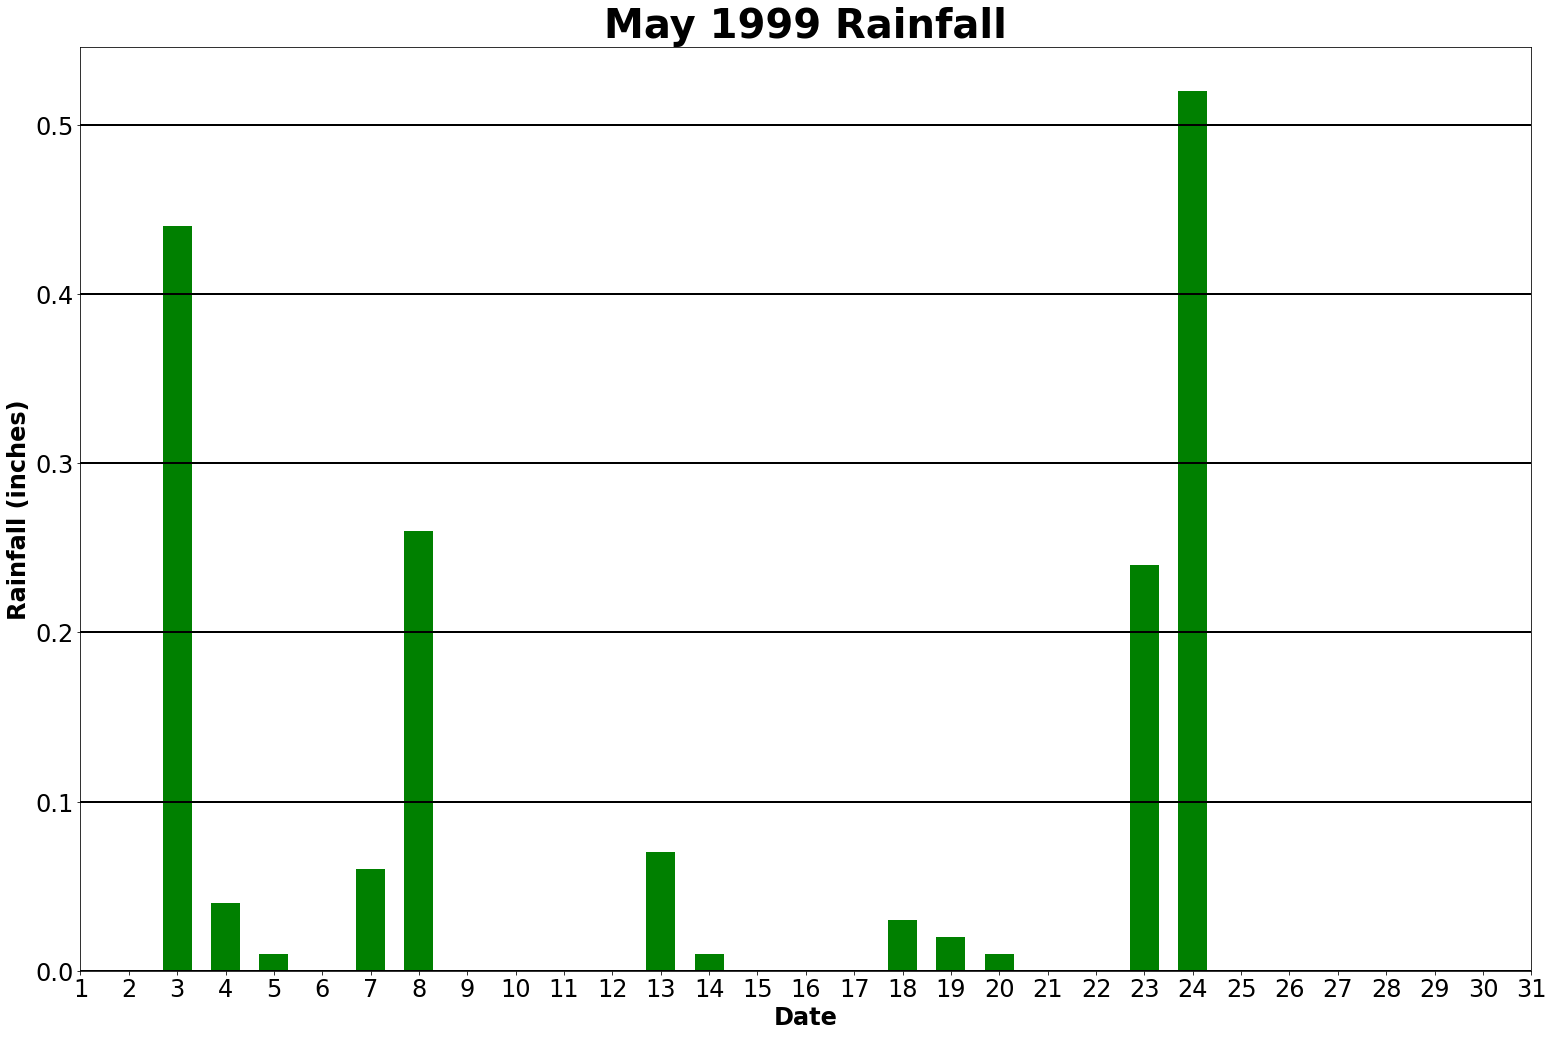

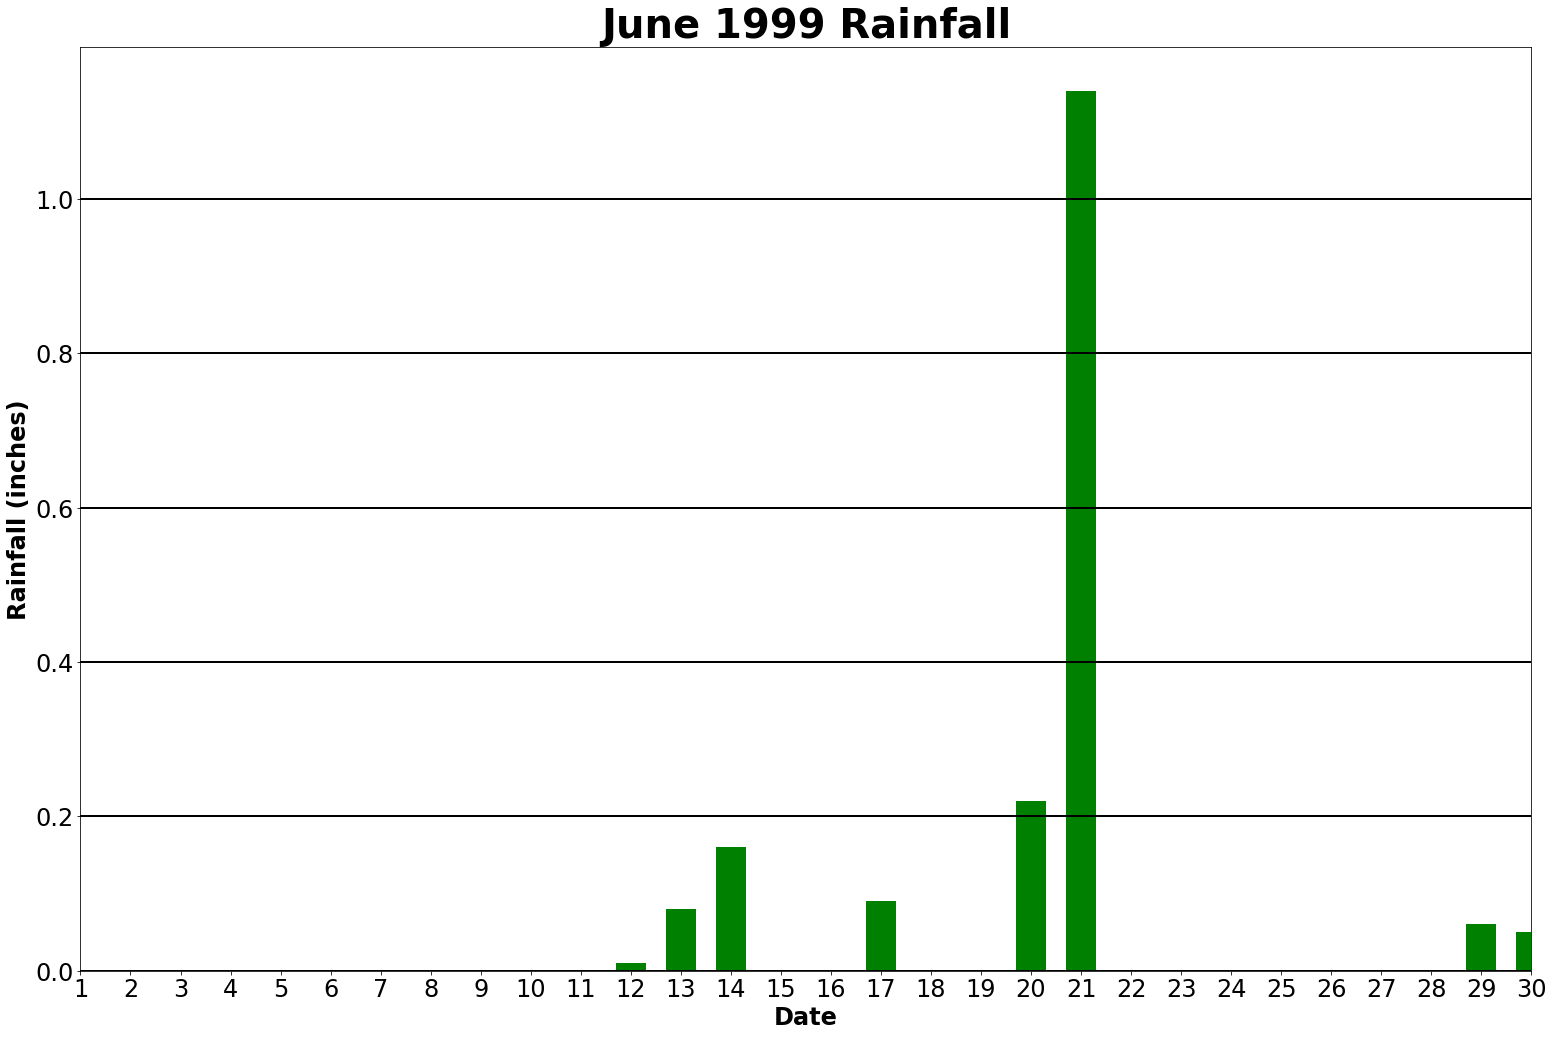

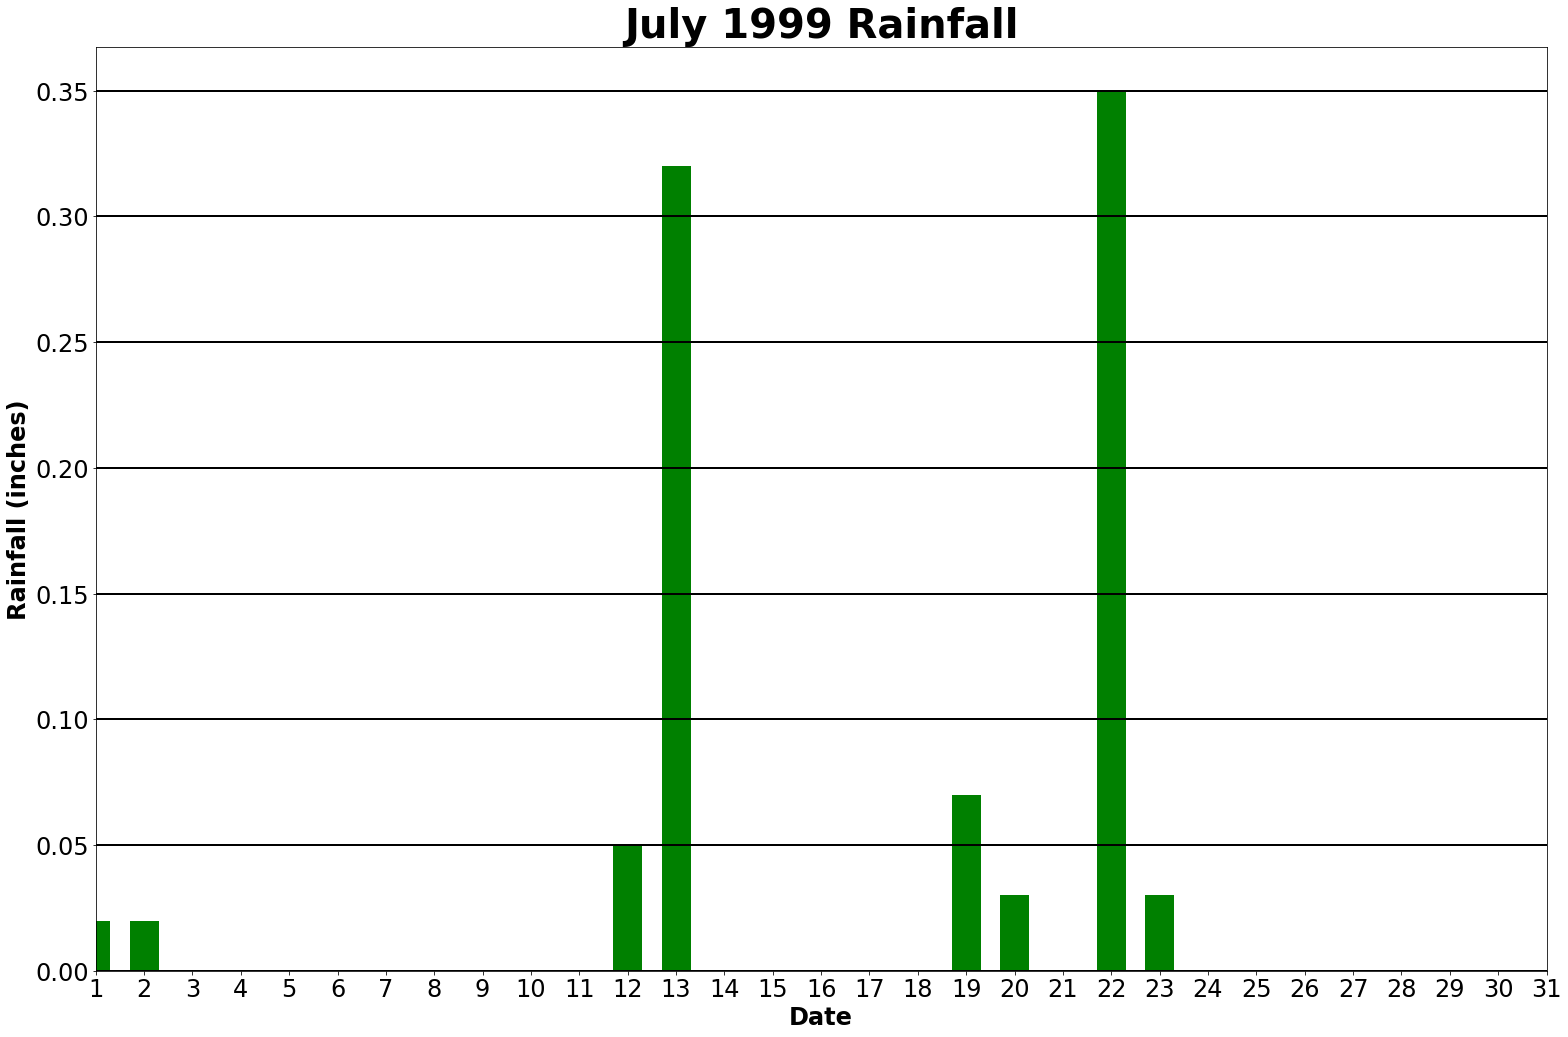

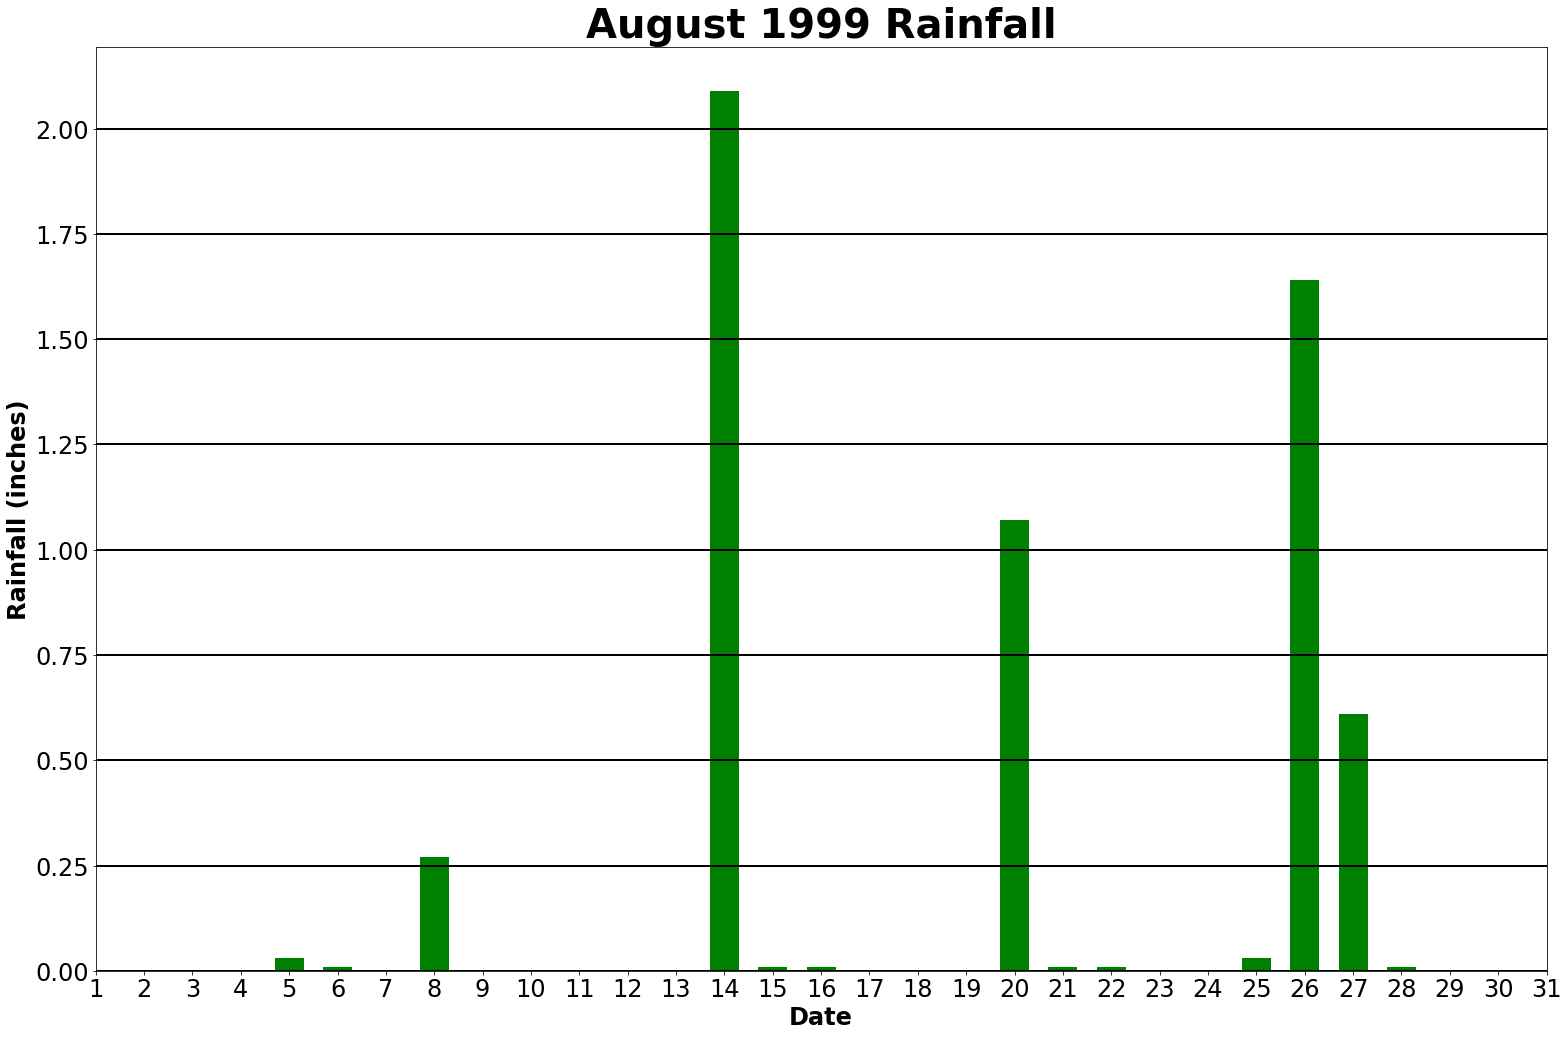

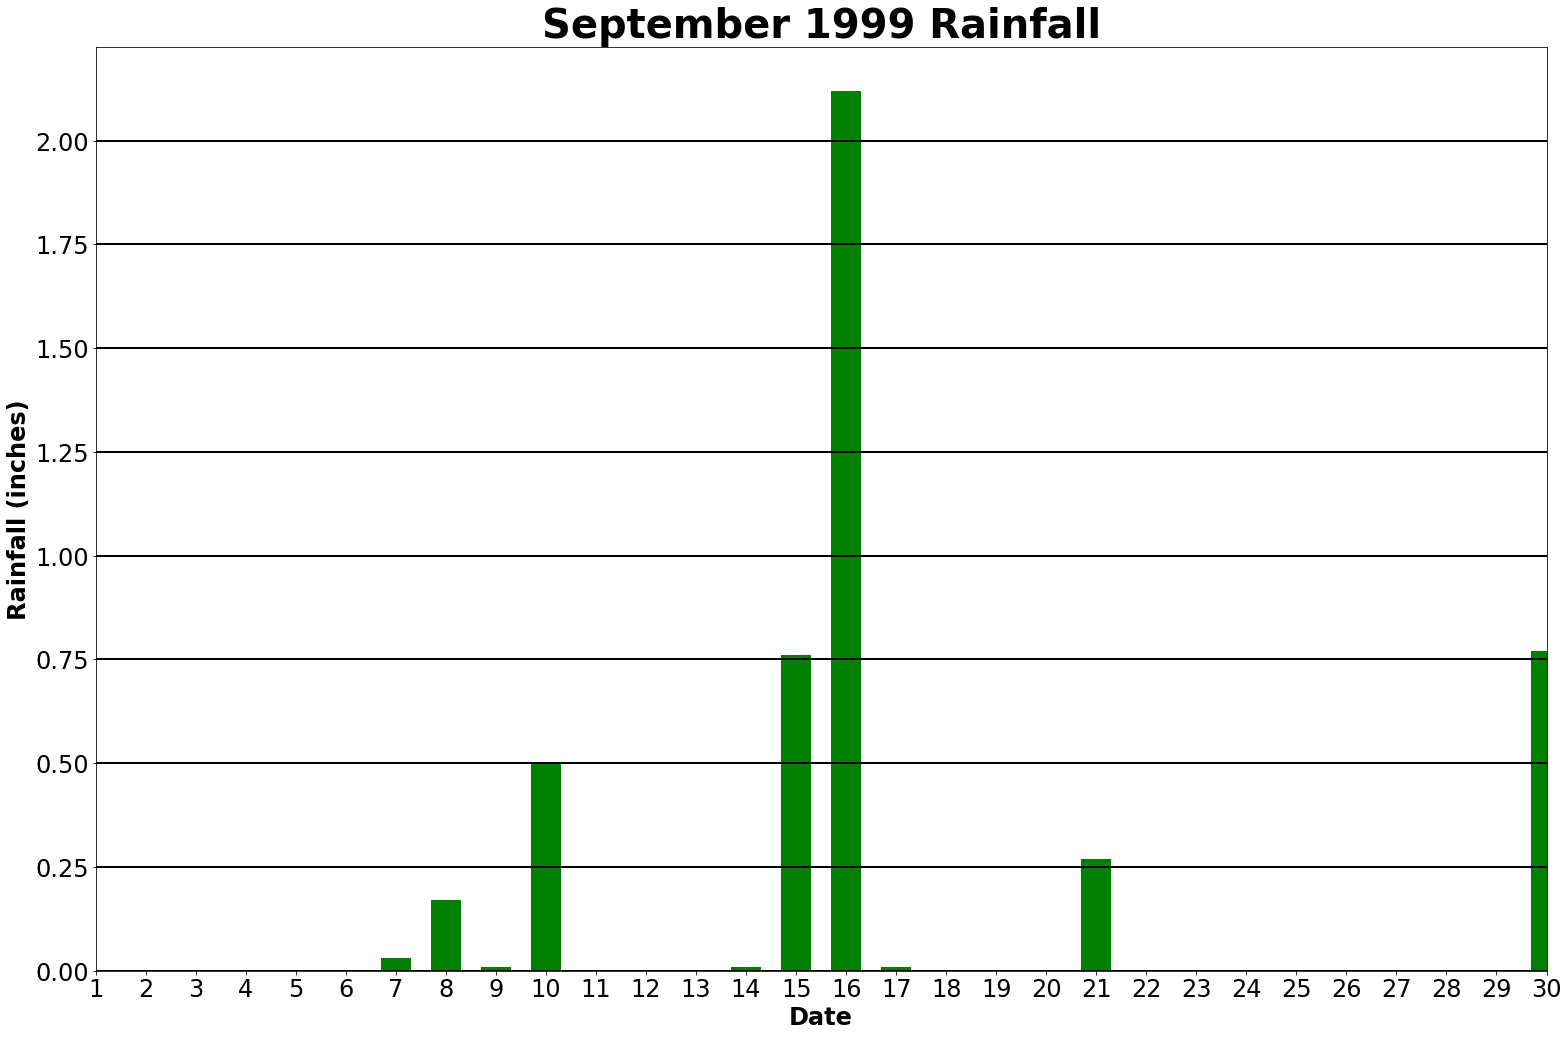

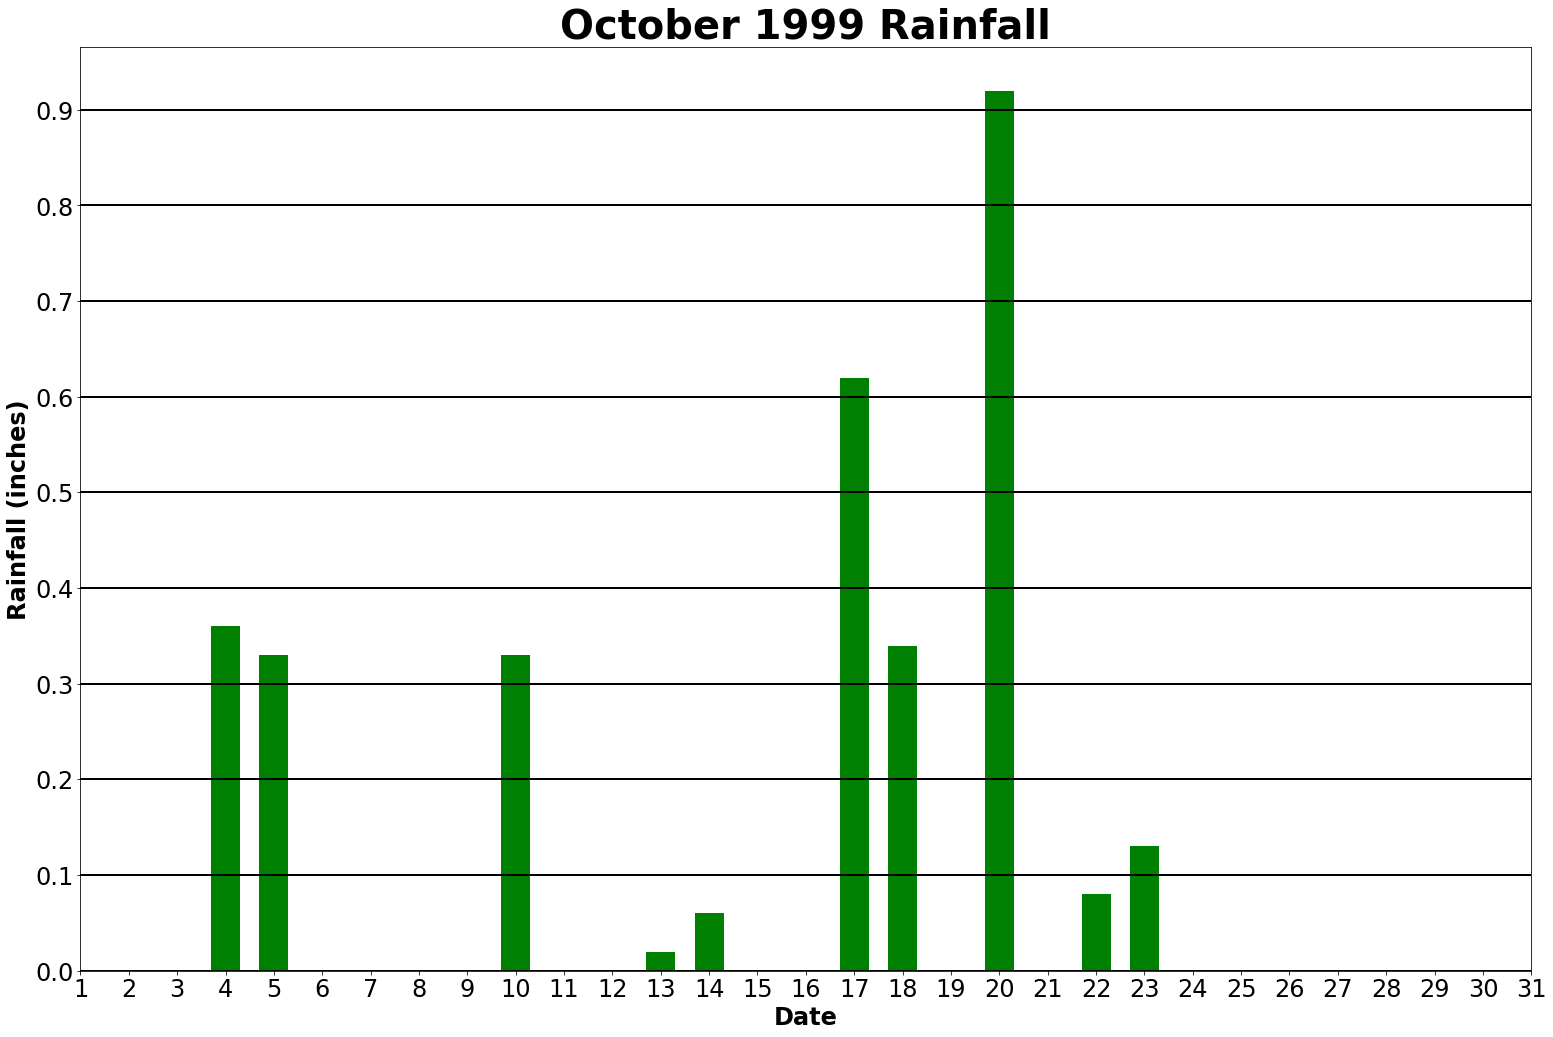

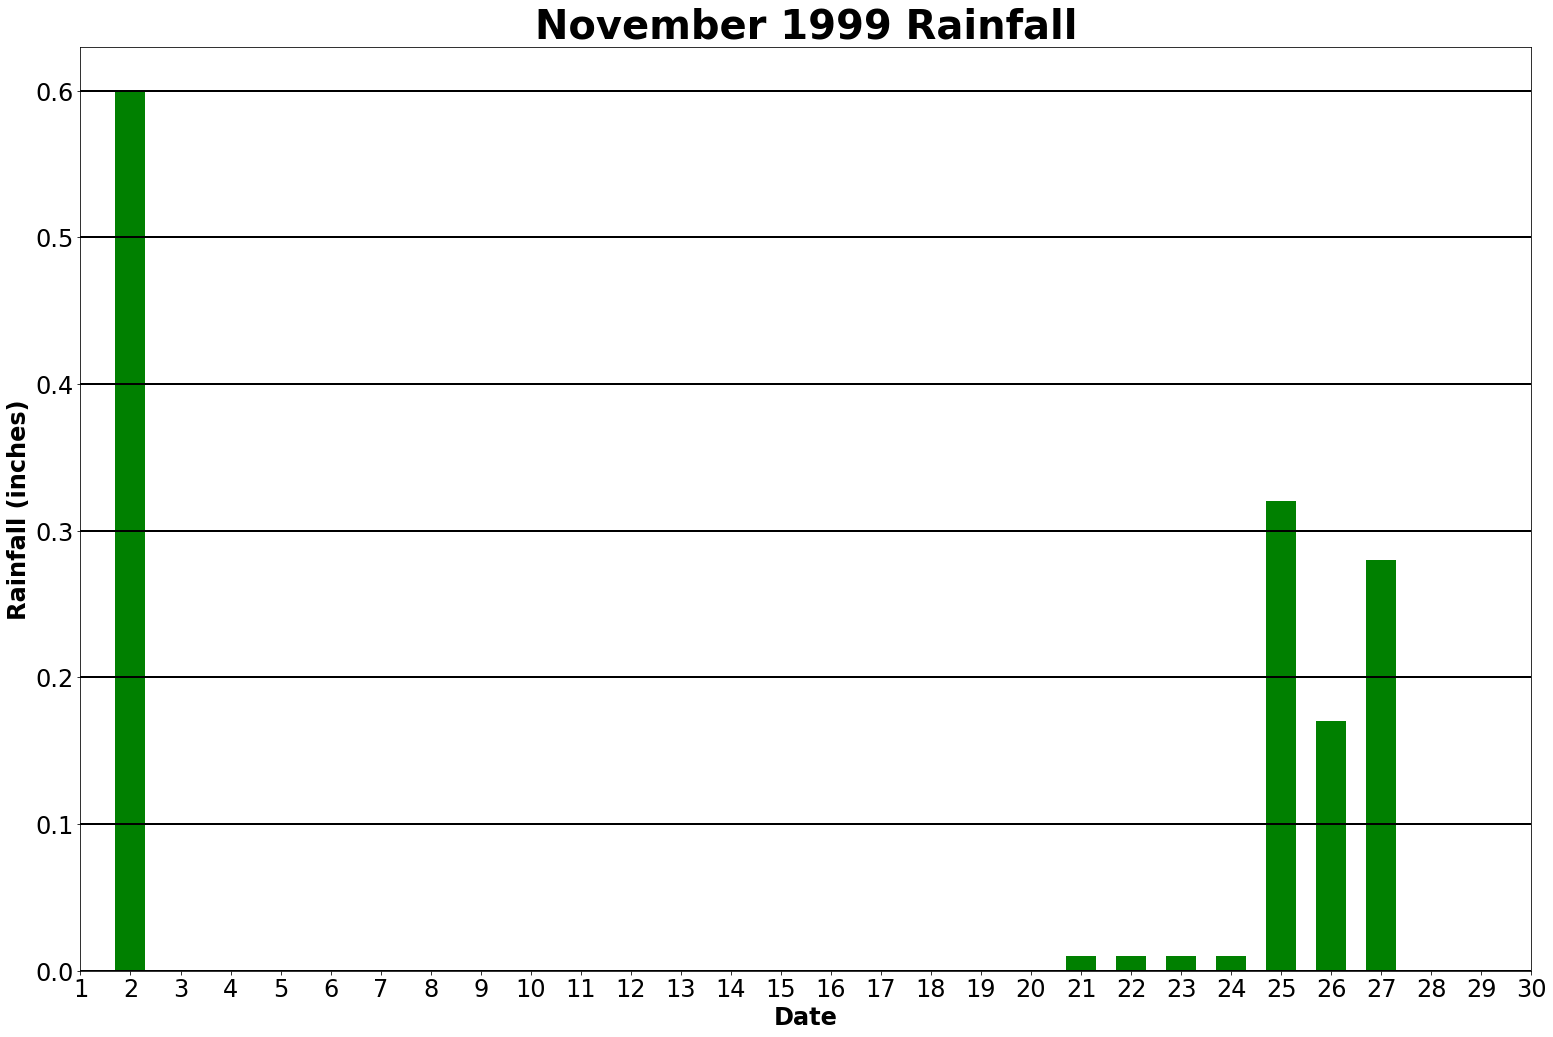

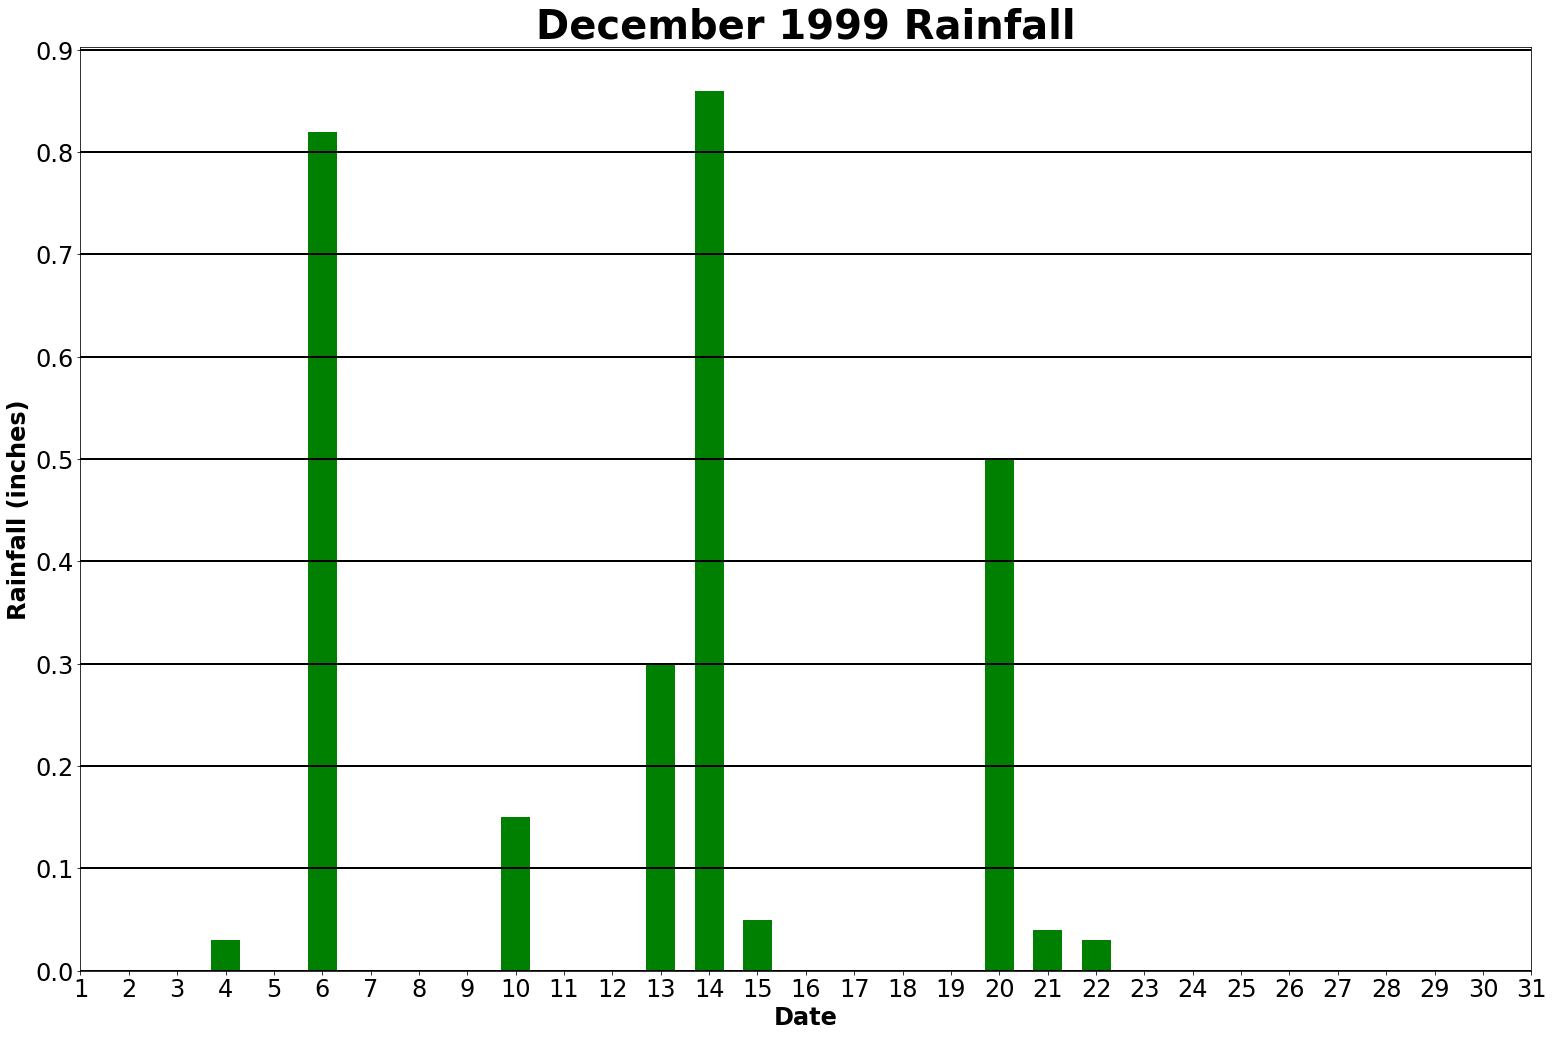

In [26]:
#
# make some graphs - now some rainfall bar plot
#

months = ['January','February', 'March','April','May','June','July','August','September','October','November','December']
#months = ['January','February', 'March','April','May','June','July','August']
year = "1999"

year = int(year)

if (year % 400 == 0):
    leap_year = True
elif (year % 100 == 0):
    leap_year = False
elif (year % 4 == 0):
    leap_year = True
else:
    leap_year = False


for month_name in months:
    
    print(f'{month_name} {year}')
    month31 = ['January','March', 'May', 'July', 'August', 'October', 'December']
    month30 = ['April', 'June', 'September', 'November']
    month28 = ['February']
 
    if month_name in month31:
        r = 31
    elif month_name in month30:
        r = 30 
    elif month_name in month28:
        if leap_year:
            r = 29
        else:
            r = 28
    else:
        r = 31
        
    print(r)    
       
    
    #Set up data
    path = '/Volumes/Elements/code/readexcel/'
    wxdata = f'{month_name}_{year}.xlsx'
    getWXdata = pd.read_excel(f'{path}{wxdata}')
    getWXdata = getWXdata.drop((r), axis=0)      
    
    #Plot the results in matplotlib
    plt.figure(figsize=(26, 17))
    plt.grid(axis = "y", linewidth = 2.0, color = 'black')
    plt.locator_params(axis='x', nbins= r)
    plt.xlim(1, r)
    plt.xticks(fontsize=24)
    plt.xlabel('Date', fontsize=24, fontweight ='bold')
    plt.yticks(fontsize=24)
    plt.ylabel('Rainfall (inches)', fontsize=24, fontweight ='bold')
    plt.locator_params(axis='y', nbins=10)
    plt.title(f'{month_name} {year} Rainfall', fontsize=40, fontweight ='bold')
    plt.bar(getWXdata["Date"],getWXdata["Rainfall"], color = "green", width= 0.6)
    plt.savefig(f'{path}{month_name}rainfall_{year}')

    print(f'{month_name} {year} created')